In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob
import datetime

%matplotlib inline

## Dependent Variable
According to the research question, the dependent variable of this research is the number of round trips at each station. After filtering out all round trips, calculate the number of round trips for each station based on the station name and station ID.

In [2]:
stations = pd.read_csv('data_csv/stations.csv')
stations

,name,id,lat,lon,capacity
0,"River Street , Clerkenwell",1,51.529163,-0.109971,19
1,"Phillimore Gardens, Kensington",2,51.499607,-0.197574,37
2,"Christopher Street, Liverpool Street",3,51.521284,-0.084606,32
3,"St. Chad's Street, King's Cross",4,51.530059,-0.120974,23
4,"Broadcasting House, Marylebone",6,51.518118,-0.144229,18
...,...,...,...,...,...
784,"George Row, Bermondsey",840,51.498585,-0.068982,22
785,"Tower Wharf, Bermondsey",841,51.500845,-0.074704,20
786,"Temple Gardens, Temple",842,51.510981,-0.108322,24
787,"Canada Water Station, Rotherhithe",844,51.498439,-0.049150,35


In [3]:
round2021 = pd.read_csv('data_csv/round2021.csv')
round2021['id'].value_counts()

785.0    1819
191.0    1488
307.0     739
111.0     650
303.0     627
         ... 
84.0        6
174.0       5
54.0        5
528.0       3
41.0        1
Name: id, Length: 782, dtype: int64

In [4]:
station2021 = round2021['id'].value_counts().rename_axis('id').reset_index(name='number')
station2021

,id,number
0,785.0,1819
1,191.0,1488
2,307.0,739
3,111.0,650
4,303.0,627
...,...,...
777,84.0,6
778,174.0,5
779,54.0,5
780,528.0,3


In [5]:
station2021= pd.merge(stations,station2021 , left_on='id',right_on='id',how='left')
station2021

,name,id,lat,lon,capacity,number
0,"River Street , Clerkenwell",1,51.529163,-0.109971,19,10.0
1,"Phillimore Gardens, Kensington",2,51.499607,-0.197574,37,33.0
2,"Christopher Street, Liverpool Street",3,51.521284,-0.084606,32,13.0
3,"St. Chad's Street, King's Cross",4,51.530059,-0.120974,23,22.0
4,"Broadcasting House, Marylebone",6,51.518118,-0.144229,18,35.0
...,...,...,...,...,...,...
784,"George Row, Bermondsey",840,51.498585,-0.068982,22,85.0
785,"Tower Wharf, Bermondsey",841,51.500845,-0.074704,20,65.0
786,"Temple Gardens, Temple",842,51.510981,-0.108322,24,43.0
787,"Canada Water Station, Rotherhithe",844,51.498439,-0.049150,35,186.0


In [6]:
station2021.isnull().sum()

name        0
id          0
lat         0
lon         0
capacity    0
number      7
dtype: int64

In [7]:
station2021 = station2021.fillna(0)

In [8]:
station2021

,name,id,lat,lon,capacity,number
0,"River Street , Clerkenwell",1,51.529163,-0.109971,19,10.0
1,"Phillimore Gardens, Kensington",2,51.499607,-0.197574,37,33.0
2,"Christopher Street, Liverpool Street",3,51.521284,-0.084606,32,13.0
3,"St. Chad's Street, King's Cross",4,51.530059,-0.120974,23,22.0
4,"Broadcasting House, Marylebone",6,51.518118,-0.144229,18,35.0
...,...,...,...,...,...,...
784,"George Row, Bermondsey",840,51.498585,-0.068982,22,85.0
785,"Tower Wharf, Bermondsey",841,51.500845,-0.074704,20,65.0
786,"Temple Gardens, Temple",842,51.510981,-0.108322,24,43.0
787,"Canada Water Station, Rotherhithe",844,51.498439,-0.049150,35,186.0


In [9]:
station2021.to_csv('station2021.csv', index=False)

In [10]:
import folium
import pandas as pd

# define the world map
world_map = folium.Map()

In [11]:
# Load the stations's location
park_map = folium.Map(location=[station2021['lat'].mean(), station2021['lon'].mean()], zoom_start=12.5, control_scale=True,) 

incidents = folium.map.FeatureGroup()
for name,row in station2021.iterrows():
    incidents.add_child(
        folium.CircleMarker(
            (row["lat"], row["lon"]),
            radius=3,                   # 圆圈半径 
            color='#FF1493',            # 标志的外圈颜色 
            fill=True,                  # 是否填充 
            fill_color='#00FF00',       # 填充颜色 
            fill_opacity=0.4            # 填充透明度 
        )
    )
park_map.add_child(incidents)

## Independent Variable
The independent variables contain the four factors that affect the number of round trips that this research focuses on.

In [12]:
import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt, ceil
import math
import time

In [13]:
def geodistance(lng1,lat1,lng2,lat2):
    lng1, lat1, lng2, lat2 = map(radians, [float(lng1), float(lat1), float(lng2), float(lat2)]) 
    dlon=lng2-lng1
    dlat=lat2-lat1
    a=sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    distance=2*asin(sqrt(a))*6371*1000
    distance=round(distance,0)
    return distance

### The minimum distance from each bike station to the train station

In [14]:
rail2021 = pd.read_csv('data_csv/rail2021.csv')
rail2021

,name,id,lat,lon,capacity,number,Blackfriars_lat,Blackfriars_lon,Cannon Street_lat,Cannon Street_lon,...,Stratford_lat,Stratford_lon,Stratford International_lat,Stratford International_lon,Clapham Junction_lat,Clapham Junction_lon,Vauxhall_lat,Vauxhall_lon,Waterloo East_lat,Waterloo East_lon
0,"River Street , Clerkenwell",1,51.529163,-0.109971,19,10,51.5116,-0.103,51.5101,-0.0912,...,51.5417,-0.0037,51.5448,-0.0087,51.4644,-0.1703,51.4859,-0.1229,51.5041,-0.1101
1,"Phillimore Gardens, Kensington",2,51.499607,-0.197574,37,33,51.5116,-0.103,51.5101,-0.0912,...,51.5417,-0.0037,51.5448,-0.0087,51.4644,-0.1703,51.4859,-0.1229,51.5041,-0.1101
2,"Christopher Street, Liverpool Street",3,51.521284,-0.084606,32,13,51.5116,-0.103,51.5101,-0.0912,...,51.5417,-0.0037,51.5448,-0.0087,51.4644,-0.1703,51.4859,-0.1229,51.5041,-0.1101
3,"St. Chad's Street, King's Cross",4,51.530059,-0.120974,23,22,51.5116,-0.103,51.5101,-0.0912,...,51.5417,-0.0037,51.5448,-0.0087,51.4644,-0.1703,51.4859,-0.1229,51.5041,-0.1101
4,"Broadcasting House, Marylebone",6,51.518118,-0.144229,18,35,51.5116,-0.103,51.5101,-0.0912,...,51.5417,-0.0037,51.5448,-0.0087,51.4644,-0.1703,51.4859,-0.1229,51.5041,-0.1101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,"George Row, Bermondsey",840,51.498585,-0.068982,22,85,51.5116,-0.103,51.5101,-0.0912,...,51.5417,-0.0037,51.5448,-0.0087,51.4644,-0.1703,51.4859,-0.1229,51.5041,-0.1101
785,"Tower Wharf, Bermondsey",841,51.500845,-0.074704,20,65,51.5116,-0.103,51.5101,-0.0912,...,51.5417,-0.0037,51.5448,-0.0087,51.4644,-0.1703,51.4859,-0.1229,51.5041,-0.1101
786,"Temple Gardens, Temple",842,51.510981,-0.108322,24,43,51.5116,-0.103,51.5101,-0.0912,...,51.5417,-0.0037,51.5448,-0.0087,51.4644,-0.1703,51.4859,-0.1229,51.5041,-0.1101
787,"Canada Water Station, Rotherhithe",844,51.498439,-0.049150,35,186,51.5116,-0.103,51.5101,-0.0912,...,51.5417,-0.0037,51.5448,-0.0087,51.4644,-0.1703,51.4859,-0.1229,51.5041,-0.1101


In [15]:
rail2021['Blackfriars_diatance'] = rail2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Blackfriars_lon'], ser['Blackfriars_lat']), axis=1)
rail2021['Cannon Street_diatance'] = rail2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Cannon Street_lon'], ser['Cannon Street_lat']), axis=1)
rail2021['Charing Cross_diatance'] = rail2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Charing Cross_lon'], ser['Charing Cross_lat']), axis=1)
rail2021['Euston_diatance'] = rail2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Euston_lon'], ser['Euston_lat']), axis=1)
rail2021['Fenchurch Street_diatance'] = rail2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Fenchurch Street_lon'], ser['Fenchurch Street_lat']), axis=1)
rail2021['Kings Cross_diatance'] = rail2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Kings Cross_lon'], ser['Kings Cross_lat']), axis=1)
rail2021['Liverpool Street_diatance'] = rail2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Liverpool Street_lon'], ser['Liverpool Street_lat']), axis=1)
rail2021['London Bridge_diatance'] = rail2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['London Bridge_lon'], ser['London Bridge_lat']), axis=1)
rail2021['Marylebone_diatance'] = rail2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Marylebone_lon'], ser['Marylebone_lat']), axis=1)
rail2021['Paddington_diatance'] = rail2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Paddington_lon'], ser['Paddington_lat']), axis=1)
rail2021['Victoria_diatance'] = rail2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Victoria_lon'], ser['Victoria_lat']), axis=1)
rail2021['Waterloo_diatance'] = rail2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Waterloo_lon'], ser['Waterloo_lat']), axis=1)
rail2021['St Pancras_diatance'] = rail2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['St Pancras_lon'], ser['St Pancras_lat']), axis=1)
rail2021['Stratford_diatance'] = rail2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Stratford_lon'], ser['Stratford_lat']), axis=1)
rail2021['Stratford International_diatance'] = rail2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Stratford International_lon'], ser['Stratford International_lat']), axis=1)
rail2021['Clapham Junction_diatance'] = rail2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Clapham Junction_lon'], ser['Clapham Junction_lat']), axis=1)
rail2021['Vauxhall_diatance'] = rail2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Vauxhall_lon'], ser['Vauxhall_lat']), axis=1)
rail2021['Waterloo East_diatance'] = rail2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Waterloo East_lon'], ser['Waterloo East_lat']), axis=1)

rail2021

,name,id,lat,lon,capacity,number,Blackfriars_lat,Blackfriars_lon,Cannon Street_lat,Cannon Street_lon,...,Marylebone_diatance,Paddington_diatance,Victoria_diatance,Waterloo_diatance,St Pancras_diatance,Stratford_diatance,Stratford International_diatance,Clapham Junction_diatance,Vauxhall_diatance,Waterloo East_diatance
0,"River Street , Clerkenwell",1,51.529163,-0.109971,19,10,51.5116,-0.103,51.5101,-0.0912,...,3730.0,4821.0,4350.0,2907.0,1143.0,7481.0,7217.0,8325.0,4893.0,2787.0
1,"Phillimore Gardens, Kensington",2,51.499607,-0.197574,37,33,51.5116,-0.103,51.5101,-0.0912,...,3542.0,2415.0,3668.0,5853.0,6079.0,14207.0,14001.0,4347.0,5390.0,6075.0
2,"Christopher Street, Liverpool Street",3,51.521284,-0.084606,32,13,51.5116,-0.103,51.5101,-0.0912,...,5428.0,6403.0,4989.0,2829.0,3083.0,6039.0,5866.0,8672.0,4744.0,2601.0
3,"St. Chad's Street, King's Cross",4,51.530059,-0.120974,23,22,51.5116,-0.103,51.5101,-0.0912,...,3009.0,4129.0,4069.0,3046.0,385.0,8214.0,7936.0,8060.0,4912.0,2983.0
4,"Broadcasting House, Marylebone",6,51.518118,-0.144229,18,35,51.5116,-0.103,51.5101,-0.0912,...,1412.0,2263.0,2393.0,2720.0,1938.0,10069.0,9833.0,6240.0,3875.0,2830.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,"George Row, Bermondsey",840,51.498585,-0.068982,22,85,51.5116,-0.103,51.5101,-0.0912,...,7054.0,7747.0,5253.0,3102.0,5379.0,6587.0,6618.0,7980.0,3990.0,2911.0
785,"Tower Wharf, Bermondsey",841,51.500845,-0.074704,20,65,51.5116,-0.103,51.5101,-0.0912,...,6592.0,7300.0,4875.0,2676.0,4918.0,6691.0,6689.0,7762.0,3728.0,2477.0
786,"Temple Gardens, Temple",842,51.510981,-0.108322,24,43,51.5116,-0.103,51.5101,-0.0912,...,4016.0,4794.0,2989.0,939.0,2582.0,8003.0,7851.0,6726.0,2966.0,775.0
787,"Canada Water Station, Rotherhithe",844,51.498439,-0.049150,35,186,51.5116,-0.103,51.5101,-0.0912,...,8342.0,9082.0,6624.0,4464.0,6464.0,5747.0,5866.0,9204.0,5293.0,4266.0


In [16]:
dfrail2021 = rail2021.iloc[:,42:]
dfrail2021['min_rail'] = dfrail2021.idxmin(axis=1)
dfrail2021['min_rail_distance'] = dfrail2021.min(axis=1)
dfrail2021

/tmp/ipykernel_4654/2001757389.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfrail2021['min_rail_distance'] = dfrail2021.min(axis=1)


,Blackfriars_diatance,Cannon Street_diatance,Charing Cross_diatance,Euston_diatance,Fenchurch Street_diatance,Kings Cross_diatance,Liverpool Street_diatance,London Bridge_diatance,Marylebone_diatance,Paddington_diatance,Victoria_diatance,Waterloo_diatance,St Pancras_diatance,Stratford_diatance,Stratford International_diatance,Clapham Junction_diatance,Vauxhall_diatance,Waterloo East_diatance,min_rail,min_rail_distance
0,2012.0,2486.0,2574.0,1698.0,2950.0,990.0,2275.0,3163.0,3730.0,4821.0,4350.0,2907.0,1143.0,7481.0,7217.0,8325.0,4893.0,2787.0,Kings Cross_diatance,990.0
1,6680.0,7454.0,5229.0,5433.0,8359.0,6302.0,8276.0,7811.0,3542.0,2415.0,3668.0,5853.0,6079.0,14207.0,14001.0,4347.0,5390.0,6075.0,Paddington_diatance,2415.0
2,1667.0,1325.0,3073.0,3549.0,1182.0,2948.0,362.0,1778.0,5428.0,6403.0,4989.0,2829.0,3083.0,6039.0,5866.0,8672.0,4744.0,2601.0,Liverpool Street_diatance,362.0
3,2400.0,3028.0,2513.0,948.0,3609.0,306.0,2993.0,3707.0,3009.0,4129.0,4069.0,3046.0,385.0,8214.0,7936.0,8060.0,4912.0,2983.0,Kings Cross_diatance,306.0
4,2944.0,3776.0,1879.0,1356.0,4623.0,2149.0,4313.0,4333.0,1412.0,2263.0,2393.0,2720.0,1938.0,10069.0,9833.0,6240.0,3875.0,2830.0,Euston_diatance,1356.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,2764.0,2001.0,3875.0,5636.0,1564.0,5317.0,2388.0,1342.0,7054.0,7747.0,5253.0,3102.0,5379.0,6587.0,6618.0,7980.0,3990.0,2911.0,London Bridge_diatance,1342.0
785,2295.0,1537.0,3430.0,5169.0,1200.0,4860.0,2025.0,874.0,6592.0,7300.0,4875.0,2676.0,4918.0,6691.0,6689.0,7762.0,3728.0,2477.0,London Bridge_diatance,874.0
786,375.0,1189.0,1093.0,2676.0,2078.0,2597.0,2010.0,1727.0,4016.0,4794.0,2989.0,939.0,2582.0,8003.0,7851.0,6726.0,2966.0,775.0,Blackfriars_diatance,375.0
787,4004.0,3186.0,5217.0,6797.0,2479.0,6371.0,3180.0,2603.0,8342.0,9082.0,6624.0,4464.0,6464.0,5747.0,5866.0,9204.0,5293.0,4266.0,Fenchurch Street_diatance,2479.0


In [17]:
GWRrail2021= pd.merge(rail2021,dfrail2021,how='left')
GWRrail2021

,name,id,lat,lon,capacity,number,Blackfriars_lat,Blackfriars_lon,Cannon Street_lat,Cannon Street_lon,...,Victoria_diatance,Waterloo_diatance,St Pancras_diatance,Stratford_diatance,Stratford International_diatance,Clapham Junction_diatance,Vauxhall_diatance,Waterloo East_diatance,min_rail,min_rail_distance
0,"River Street , Clerkenwell",1,51.529163,-0.109971,19,10,51.5116,-0.103,51.5101,-0.0912,...,4350.0,2907.0,1143.0,7481.0,7217.0,8325.0,4893.0,2787.0,Kings Cross_diatance,990.0
1,"Phillimore Gardens, Kensington",2,51.499607,-0.197574,37,33,51.5116,-0.103,51.5101,-0.0912,...,3668.0,5853.0,6079.0,14207.0,14001.0,4347.0,5390.0,6075.0,Paddington_diatance,2415.0
2,"Christopher Street, Liverpool Street",3,51.521284,-0.084606,32,13,51.5116,-0.103,51.5101,-0.0912,...,4989.0,2829.0,3083.0,6039.0,5866.0,8672.0,4744.0,2601.0,Liverpool Street_diatance,362.0
3,"St. Chad's Street, King's Cross",4,51.530059,-0.120974,23,22,51.5116,-0.103,51.5101,-0.0912,...,4069.0,3046.0,385.0,8214.0,7936.0,8060.0,4912.0,2983.0,Kings Cross_diatance,306.0
4,"Broadcasting House, Marylebone",6,51.518118,-0.144229,18,35,51.5116,-0.103,51.5101,-0.0912,...,2393.0,2720.0,1938.0,10069.0,9833.0,6240.0,3875.0,2830.0,Euston_diatance,1356.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,"George Row, Bermondsey",840,51.498585,-0.068982,22,85,51.5116,-0.103,51.5101,-0.0912,...,5253.0,3102.0,5379.0,6587.0,6618.0,7980.0,3990.0,2911.0,London Bridge_diatance,1342.0
785,"Tower Wharf, Bermondsey",841,51.500845,-0.074704,20,65,51.5116,-0.103,51.5101,-0.0912,...,4875.0,2676.0,4918.0,6691.0,6689.0,7762.0,3728.0,2477.0,London Bridge_diatance,874.0
786,"Temple Gardens, Temple",842,51.510981,-0.108322,24,43,51.5116,-0.103,51.5101,-0.0912,...,2989.0,939.0,2582.0,8003.0,7851.0,6726.0,2966.0,775.0,Blackfriars_diatance,375.0
787,"Canada Water Station, Rotherhithe",844,51.498439,-0.049150,35,186,51.5116,-0.103,51.5101,-0.0912,...,6624.0,4464.0,6464.0,5747.0,5866.0,9204.0,5293.0,4266.0,Fenchurch Street_diatance,2479.0


### The minimum distance from each bike station to the park

In [18]:
park2021 = pd.read_csv('data_csv/park2021.csv')
park2021

,name,id,lat,lon,capacity,number,Hyde Park Marble Arch_lat,Hyde Park Marble Arch_lon,Hyde Park Park Lane_lat,Hyde Park Park Lane_lon,...,Queen Elizabeth Olympic Park Copper_lat,Queen Elizabeth Olympic Park Copper_lon,Queen Elizabeth Olympic Park Bassett_lat,Queen Elizabeth Olympic Park Bassett_lon,Queen Elizabeth Olympic Park Blossom_lat,Queen Elizabeth Olympic Park Blossom_lon,Queen Elizabeth Olympic Park Thornton Bridge_lat,Queen Elizabeth Olympic Park Thornton Bridge_lon,Queen Elizabeth Olympic Park Aquatic Centre_lat,Queen Elizabeth Olympic Park Aquatic Centre_lon
0,"River Street , Clerkenwell",1,51.529163,-0.109971,19,10,51.512123,-0.158683,51.510903,-0.158005,...,51.545408,-0.018968,51.541115,-0.018483,51.546567,-0.015258,51.538228,-0.011574,51.540973,-0.011167
1,"Phillimore Gardens, Kensington",2,51.499607,-0.197574,37,33,51.512123,-0.158683,51.510903,-0.158005,...,51.545408,-0.018968,51.541115,-0.018483,51.546567,-0.015258,51.538228,-0.011574,51.540973,-0.011167
2,"Christopher Street, Liverpool Street",3,51.521284,-0.084606,32,13,51.512123,-0.158683,51.510903,-0.158005,...,51.545408,-0.018968,51.541115,-0.018483,51.546567,-0.015258,51.538228,-0.011574,51.540973,-0.011167
3,"St. Chad's Street, King's Cross",4,51.530059,-0.120974,23,22,51.512123,-0.158683,51.510903,-0.158005,...,51.545408,-0.018968,51.541115,-0.018483,51.546567,-0.015258,51.538228,-0.011574,51.540973,-0.011167
4,"Broadcasting House, Marylebone",6,51.518118,-0.144229,18,35,51.512123,-0.158683,51.510903,-0.158005,...,51.545408,-0.018968,51.541115,-0.018483,51.546567,-0.015258,51.538228,-0.011574,51.540973,-0.011167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,"George Row, Bermondsey",840,51.498585,-0.068982,22,85,51.512123,-0.158683,51.510903,-0.158005,...,51.545408,-0.018968,51.541115,-0.018483,51.546567,-0.015258,51.538228,-0.011574,51.540973,-0.011167
785,"Tower Wharf, Bermondsey",841,51.500845,-0.074704,20,65,51.512123,-0.158683,51.510903,-0.158005,...,51.545408,-0.018968,51.541115,-0.018483,51.546567,-0.015258,51.538228,-0.011574,51.540973,-0.011167
786,"Temple Gardens, Temple",842,51.510981,-0.108322,24,43,51.512123,-0.158683,51.510903,-0.158005,...,51.545408,-0.018968,51.541115,-0.018483,51.546567,-0.015258,51.538228,-0.011574,51.540973,-0.011167
787,"Canada Water Station, Rotherhithe",844,51.498439,-0.049150,35,186,51.512123,-0.158683,51.510903,-0.158005,...,51.545408,-0.018968,51.541115,-0.018483,51.546567,-0.015258,51.538228,-0.011574,51.540973,-0.011167


In [19]:
park2021['Hyde Park Marble Arch_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Hyde Park Marble Arch_lon'], ser['Hyde Park Marble Arch_lat']), axis=1)
park2021['Hyde Park Park Lane_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Hyde Park Park Lane_lon'], ser['Hyde Park Park Lane_lat']), axis=1)
park2021['Hyde Park Queen Elizabeth Gate_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Hyde Park Queen Elizabeth Gate_lon'], ser['Hyde Park Queen Elizabeth Gate_lat']), axis=1)
park2021['Hyde Park White Horse Gate_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Hyde Park White Horse Gate_lon'], ser['Hyde Park White Horse Gate_lat']), axis=1)
park2021['Hyde Park Albert Gate_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Hyde Park Albert Gate_lon'], ser['Hyde Park Albert Gate_lat']), axis=1)
park2021['Hyde Park Alexandra Gate_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Hyde Park Alexandra Gate_lon'], ser['Hyde Park Alexandra Gate_lat']), axis=1)
park2021['Serpentine Bridge South_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Serpentine Bridge South_lon'], ser['Serpentine Bridge South_lat']), axis=1)
park2021['Serpentine Bridge North_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Serpentine Bridge North_lon'], ser['Serpentine Bridge North_lat']), axis=1)
park2021['Hyde Park Victoria Gate_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Hyde Park Victoria Gate_lon'], ser['Hyde Park Victoria Gate_lat']), axis=1)

park2021['Kensington Gardens Albert Memorial Gate_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Kensington Gardens Albert Memorial Gate_lon'], ser['Kensington Gardens Albert Memorial Gate_lat']), axis=1)
park2021['Kensington Gardens Queen Gate_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Kensington Gardens Queen Gate_lon'], ser['Kensington Gardens Queen Gate_lat']), axis=1)
park2021['Kensington Gardens Palace Gate_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Kensington Gardens Palace Gate_lon'], ser['Kensington Gardens Palace Gate_lat']), axis=1)
park2021['Kensington Gardens Studio Gate_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Kensington Gardens Studio Gate_lon'], ser['Kensington Gardens Studio Gate_lat']), axis=1)
park2021['Kensington Gardens Black Lion Gate_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Kensington Gardens Black Lion Gate_lon'], ser['Kensington Gardens Black Lion Gate_lat']), axis=1)
park2021['Kensington Gardens Lancaster Gate_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Kensington Gardens Lancaster Gate_lon'], ser['Kensington Gardens Lancaster Gate_lat']), axis=1)
park2021['Kensington Gardens Marlborough Gate_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Kensington Gardens Marlborough Gate_lon'], ser['Kensington Gardens Marlborough Gate_lat']), axis=1)

park2021['''The Regent's Park Monkey Gate_distance'''] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['''The Regent's Park Monkey Gate_lon'''], ser['''The Regent's Park Monkey Gate_lat''']), axis=1)
park2021['''The Regent's Park St. Mark's Gate_distance'''] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['''The Regent's Park St. Mark's Gate_lon'''], ser['''The Regent's Park St. Mark's Gate_lat''']), axis=1)
park2021['''The Regent's Park Chester Gate_distance'''] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['''The Regent's Park Chester Gate_lon'''], ser['''The Regent's Park Chester Gate_lat''']), axis=1)
park2021['''The Regent's Park St. Andrew's Gate_distance'''] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['''The Regent's Park St. Andrew's Gate_lon'''], ser['''The Regent's Park St. Andrew's Gate_lat''']), axis=1)
park2021['''The Regent's Park York Gate_distance'''] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['''The Regent's Park York Gate_lon'''], ser['''The Regent's Park York Gate_lat''']), axis=1)
park2021['''The Regent's Park Clarence Gate_distance'''] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['''The Regent's Park Clarence Gate_lon'''], ser['''The Regent's Park Clarence Gate_lat''']), axis=1)
park2021['''The Regent's Park Hanover Gate_distance'''] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['''The Regent's Park Hanover Gate_lon'''], ser['''The Regent's Park Hanover Gate_lat''']), axis=1)

park2021['Battersea Park Sopwith Way_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Battersea Park Sopwith Way_lon'], ser['Battersea Park Sopwith Way_lat']), axis=1)
park2021['Battersea Park Rosery Gate_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Battersea Park Rosery Gate_lon'], ser['Battersea Park Rosery Gate_lat']), axis=1)
park2021['Battersea Park Sun Gate_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Battersea Park Sun Gate_lon'], ser['Battersea Park Sun Gate_lat']), axis=1)
park2021['Battersea Park Albert Gate_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Battersea Park Albert Gate_lon'], ser['Battersea Park Albert Gate_lat']), axis=1)

park2021['Green Park Devonshire Gates_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Green Park Devonshire Gates_lon'], ser['Green Park Devonshire Gates_lat']), axis=1)
park2021['Green Park Canada Gate_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Green Park Canada Gate_lon'], ser['Green Park Canada Gate_lat']), axis=1)
park2021['Green Park Wellington Arch_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Green Park Wellington Arch_lon'], ser['Green Park Wellington Arch_lat']), axis=1)

park2021['''St. James's Park Marlborough Gate_distance'''] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['''St. James's Park Marlborough Gate_lon'''], ser['''St. James's Park Marlborough Gate_lat''']), axis=1)
park2021['''St. James's Park Waterloo Place Gate_distance'''] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['''St. James's Park Waterloo Place Gate_lon'''], ser['''St. James's Park Waterloo Place Gate_lat''']), axis=1)
park2021['''St. James's Park Storey's Gate_distance'''] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['''St. James's Park Storey's Gate_lon'''], ser['''St. James's Park Storey's Gate_lat''']), axis=1)
park2021['''St. James's Park Queen Anne's Gate_distance'''] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['''St. James's Park Queen Anne's Gate_lon'''], ser['''St. James's Park Queen Anne's Gate_lat''']), axis=1)
park2021['''St. James's Park Buckingham Gate_distance'''] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['''St. James's Park Buckingham Gate_lon'''], ser['''St. James's Park Buckingham Gate_lat''']), axis=1)

park2021['''Victoria Park Cricketer's Gate_distance'''] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['''Victoria Park Cricketer's Gate_lon'''], ser['''Victoria Park Cricketer's Gate_lat''']), axis=1)
park2021['Victoria Park Bonner Gate_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Victoria Park Bonner Gate_lon'], ser['Victoria Park Bonner Gate_lat']), axis=1)
park2021['Victoria Park St Agnes Gate_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Victoria Park St Agnes Gate_lon'], ser['Victoria Park St Agnes Gate_lat']), axis=1)
park2021['Victoria Park Royal Gate West_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Victoria Park Royal Gate West_lon'], ser['Victoria Park Royal Gate West_lat']), axis=1)
park2021['''Victoria Park Queen's Gate_distance'''] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['''Victoria Park Queen's Gate_lon'''], ser['''Victoria Park Queen's Gate_lat''']), axis=1)
park2021['Victoria Park Cadogan Gate_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Victoria Park Cadogan Gate_lon'], ser['Victoria Park Cadogan Gate_lat']), axis=1)
park2021['Victoria Park Lockhouse Gate_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Victoria Park Lockhouse Gate_lon'], ser['Victoria Park Lockhouse Gate_lat']), axis=1)
park2021['''Victoria Park Gunmaker's Gate_distance'''] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['''Victoria Park Gunmaker's Gate_lon'''], ser['''Victoria Park Gunmaker's Gate_lat''']), axis=1)

park2021['Mile End Park Thoydon Road_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Mile End Park Thoydon Road_lon'], ser['Mile End Park Thoydon Road_lat']), axis=1)
park2021['Mile End Park Art Pavilion_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Mile End Park Art Pavilion_lon'], ser['Mile End Park Art Pavilion_lat']), axis=1)
park2021['Mile End Park Stadium_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Mile End Park Stadium_lon'], ser['Mile End Park Stadium_lat']), axis=1)
park2021['Mile End Park Pavilion_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Mile End Park Pavilion_lon'], ser['Mile End Park Pavilion_lat']), axis=1)
park2021['Mile End Park Football Pitch_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Mile End Park Football Pitch_lon'], ser['Mile End Park Football Pitch_lat']), axis=1)
park2021['Mile End Park Solebay Street_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Mile End Park Solebay Street_lon'], ser['Mile End Park Solebay Street_lat']), axis=1)

park2021['Holland Park Abbotsbury Gate_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Holland Park Abbotsbury Gate_lon'], ser['Holland Park Abbotsbury Gate_lat']), axis=1)
park2021['Holland Park Ilchester Gate_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Holland Park Ilchester Gate_lon'], ser['Holland Park Ilchester Gate_lat']), axis=1)
park2021['Holland Park Duchess of Bedford_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Holland Park Duchess of Bedford_lon'], ser['Holland Park Duchess of Bedford_lat']), axis=1)

park2021['''Lincoln's Inn Fields West_distance'''] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['''Lincoln's Inn Fields West_lon'''], ser['''Lincoln's Inn Fields West_lat''']), axis=1)
park2021['''Lincoln's Inn Fields South_distance'''] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['''Lincoln's Inn Fields South_lon'''], ser['''Lincoln's Inn Fields South_lat''']), axis=1)

park2021['Geraldine Mary Harmsworth Park West_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Geraldine Mary Harmsworth Park West_lon'], ser['Geraldine Mary Harmsworth Park West_lat']), axis=1)
park2021['Geraldine Mary Harmsworth Park North_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Geraldine Mary Harmsworth Park North_lon'], ser['Geraldine Mary Harmsworth Park North_lat']), axis=1)
park2021['Geraldine Mary Harmsworth Park East_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Geraldine Mary Harmsworth Park East_lon'], ser['Geraldine Mary Harmsworth Park East_lat']), axis=1)

park2021['Queen Elizabeth Olympic Park Here East North_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Queen Elizabeth Olympic Park Here East North_lon'], ser['Queen Elizabeth Olympic Park Here East North_lat']), axis=1)
park2021['Queen Elizabeth Olympic Park Here East South_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Queen Elizabeth Olympic Park Here East South_lon'], ser['Queen Elizabeth Olympic Park Here East South_lat']), axis=1)
park2021['Queen Elizabeth Olympic Park Copper_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Queen Elizabeth Olympic Park Copper_lon'], ser['Queen Elizabeth Olympic Park Copper_lat']), axis=1)
park2021['Queen Elizabeth Olympic Park Bassett_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Queen Elizabeth Olympic Park Bassett_lon'], ser['Queen Elizabeth Olympic Park Bassett_lat']), axis=1)
park2021['Queen Elizabeth Olympic Park Blossom_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Queen Elizabeth Olympic Park Blossom_lon'], ser['Queen Elizabeth Olympic Park Blossom_lat']), axis=1)
park2021['Queen Elizabeth Olympic Park Thornton Bridge_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Queen Elizabeth Olympic Park Thornton Bridge_lon'], ser['Queen Elizabeth Olympic Park Thornton Bridge_lat']), axis=1)
park2021['Queen Elizabeth Olympic Park Aquatic Centre_diatance'] = park2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Queen Elizabeth Olympic Park Aquatic Centre_lon'], ser['Queen Elizabeth Olympic Park Aquatic Centre_lat']), axis=1)

park2021

,name,id,lat,lon,capacity,number,Hyde Park Marble Arch_lat,Hyde Park Marble Arch_lon,Hyde Park Park Lane_lat,Hyde Park Park Lane_lon,...,Geraldine Mary Harmsworth Park West_diatance,Geraldine Mary Harmsworth Park North_diatance,Geraldine Mary Harmsworth Park East_diatance,Queen Elizabeth Olympic Park Here East North_diatance,Queen Elizabeth Olympic Park Here East South_diatance,Queen Elizabeth Olympic Park Copper_diatance,Queen Elizabeth Olympic Park Bassett_diatance,Queen Elizabeth Olympic Park Blossom_diatance,Queen Elizabeth Olympic Park Thornton Bridge_diatance,Queen Elizabeth Olympic Park Aquatic Centre_diatance
0,"River Street , Clerkenwell",1,51.529163,-0.109971,19,10,51.512123,-0.158683,51.510903,-0.158005,...,3736.0,3560.0,3694.0,6465.0,6495.0,6548.0,6466.0,6830.0,6880.0,6959.0
1,"Phillimore Gardens, Kensington",2,51.499607,-0.197574,37,33,51.512123,-0.158683,51.510903,-0.158005,...,6027.0,6167.0,6348.0,13325.0,13339.0,13365.0,13223.0,13652.0,13567.0,13693.0
2,"Christopher Street, Liverpool Street",3,51.521284,-0.084606,32,13,51.512123,-0.158683,51.510903,-0.158005,...,3384.0,3154.0,3176.0,5310.0,5290.0,5273.0,5078.0,5560.0,5392.0,5532.0
3,"St. Chad's Street, King's Cross",4,51.530059,-0.120974,23,22,51.512123,-0.158683,51.510903,-0.158005,...,3899.0,3758.0,3922.0,7155.0,7193.0,7259.0,7195.0,7538.0,7621.0,7691.0
4,"Broadcasting House, Marylebone",6,51.518118,-0.144229,18,35,51.512123,-0.158683,51.510903,-0.158005,...,3414.0,3394.0,3608.0,9119.0,9141.0,9181.0,9067.0,9465.0,9445.0,9549.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,"George Row, Bermondsey",840,51.498585,-0.068982,22,85,51.512123,-0.158683,51.510903,-0.158005,...,2911.0,2745.0,2582.0,6479.0,6382.0,6251.0,5880.0,6502.0,5934.0,6182.0
785,"Tower Wharf, Bermondsey",841,51.500845,-0.074704,20,65,51.512123,-0.158683,51.510903,-0.158005,...,2563.0,2380.0,2235.0,6476.0,6391.0,6279.0,5931.0,6539.0,6030.0,6264.0
786,"Temple Gardens, Temple",842,51.510981,-0.108322,24,43,51.512123,-0.158683,51.510903,-0.158005,...,1722.0,1537.0,1670.0,7311.0,7291.0,7271.0,7061.0,7557.0,7347.0,7503.0
787,"Canada Water Station, Rotherhithe",844,51.498439,-0.049150,35,186,51.512123,-0.158683,51.510903,-0.158005,...,4276.0,4116.0,3948.0,5928.0,5800.0,5625.0,5198.0,5843.0,5132.0,5411.0


In [20]:
dfpark2021 = park2021.iloc[:,134:]
dfpark2021['min_park'] = dfpark2021.idxmin(axis=1)
dfpark2021['min_park_distance'] = dfpark2021.min(axis=1)
dfpark2021

/tmp/ipykernel_4654/3749286089.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfpark2021['min_park_distance'] = dfpark2021.min(axis=1)


,Hyde Park Marble Arch_diatance,Hyde Park Park Lane_diatance,Hyde Park Queen Elizabeth Gate_diatance,Hyde Park White Horse Gate_diatance,Hyde Park Albert Gate_diatance,Hyde Park Alexandra Gate_diatance,Serpentine Bridge South_diatance,Serpentine Bridge North_diatance,Hyde Park Victoria Gate_diatance,Kensington Gardens Albert Memorial Gate_diatance,...,Geraldine Mary Harmsworth Park East_diatance,Queen Elizabeth Olympic Park Here East North_diatance,Queen Elizabeth Olympic Park Here East South_diatance,Queen Elizabeth Olympic Park Copper_diatance,Queen Elizabeth Olympic Park Bassett_diatance,Queen Elizabeth Olympic Park Blossom_diatance,Queen Elizabeth Olympic Park Thornton Bridge_diatance,Queen Elizabeth Olympic Park Aquatic Centre_diatance,min_park,min_park_distance
0,3866.0,3895.0,4047.0,4333.0,4475.0,5397.0,5110.0,4839.0,4721.0,5586.0,...,3694.0,6465.0,6495.0,6548.0,6466.0,6830.0,6880.0,6959.0,Lincoln's Inn Fields South_distance,1564.0
1,3030.0,3013.0,3166.0,2909.0,2724.0,1618.0,1805.0,2063.0,2219.0,1406.0,...,6348.0,13325.0,13339.0,13365.0,13223.0,13652.0,13567.0,13693.0,Holland Park Duchess of Bedford_diatance,386.0
2,5226.0,5208.0,5066.0,5348.0,5522.0,6583.0,6382.0,6143.0,6157.0,6791.0,...,3176.0,5310.0,5290.0,5273.0,5078.0,5560.0,5392.0,5532.0,Lincoln's Inn Fields South_distance,2273.0
3,3284.0,3332.0,3612.0,3888.0,4011.0,4850.0,4534.0,4255.0,4086.0,5028.0,...,3922.0,7155.0,7193.0,7259.0,7195.0,7538.0,7621.0,7691.0,Lincoln's Inn Fields West_distance,1584.0
4,1202.0,1246.0,1655.0,1900.0,1991.0,2765.0,2452.0,2176.0,2062.0,2942.0,...,3608.0,9119.0,9141.0,9181.0,9067.0,9465.0,9445.0,9549.0,The Regent's Park St. Andrew's Gate_distance,813.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,6388.0,6312.0,5808.0,6029.0,6213.0,7312.0,7259.0,7096.0,7302.0,7522.0,...,2582.0,6479.0,6382.0,6251.0,5880.0,6502.0,5934.0,6182.0,Geraldine Mary Harmsworth Park East_diatance,2582.0
785,5946.0,5873.0,5392.0,5619.0,5804.0,6907.0,6841.0,6672.0,6865.0,7119.0,...,2235.0,6476.0,6391.0,6279.0,5931.0,6539.0,6030.0,6264.0,Geraldine Mary Harmsworth Park East_diatance,2235.0
786,3487.0,3438.0,3146.0,3417.0,3597.0,4689.0,4536.0,4323.0,4428.0,4901.0,...,1670.0,7311.0,7291.0,7271.0,7061.0,7557.0,7347.0,7503.0,Lincoln's Inn Fields South_distance,752.0
787,7732.0,7661.0,7176.0,7399.0,7584.0,8684.0,8627.0,8460.0,8653.0,8894.0,...,3948.0,5928.0,5800.0,5625.0,5198.0,5843.0,5132.0,5411.0,Mile End Park Pavilion_diatance,2409.0


In [21]:
GWRpark2021= pd.merge(park2021,dfpark2021,how='left')
GWRpark2021

,name,id,lat,lon,capacity,number,Hyde Park Marble Arch_lat,Hyde Park Marble Arch_lon,Hyde Park Park Lane_lat,Hyde Park Park Lane_lon,...,Geraldine Mary Harmsworth Park East_diatance,Queen Elizabeth Olympic Park Here East North_diatance,Queen Elizabeth Olympic Park Here East South_diatance,Queen Elizabeth Olympic Park Copper_diatance,Queen Elizabeth Olympic Park Bassett_diatance,Queen Elizabeth Olympic Park Blossom_diatance,Queen Elizabeth Olympic Park Thornton Bridge_diatance,Queen Elizabeth Olympic Park Aquatic Centre_diatance,min_park,min_park_distance
0,"River Street , Clerkenwell",1,51.529163,-0.109971,19,10,51.512123,-0.158683,51.510903,-0.158005,...,3694.0,6465.0,6495.0,6548.0,6466.0,6830.0,6880.0,6959.0,Lincoln's Inn Fields South_distance,1564.0
1,"Phillimore Gardens, Kensington",2,51.499607,-0.197574,37,33,51.512123,-0.158683,51.510903,-0.158005,...,6348.0,13325.0,13339.0,13365.0,13223.0,13652.0,13567.0,13693.0,Holland Park Duchess of Bedford_diatance,386.0
2,"Christopher Street, Liverpool Street",3,51.521284,-0.084606,32,13,51.512123,-0.158683,51.510903,-0.158005,...,3176.0,5310.0,5290.0,5273.0,5078.0,5560.0,5392.0,5532.0,Lincoln's Inn Fields South_distance,2273.0
3,"St. Chad's Street, King's Cross",4,51.530059,-0.120974,23,22,51.512123,-0.158683,51.510903,-0.158005,...,3922.0,7155.0,7193.0,7259.0,7195.0,7538.0,7621.0,7691.0,Lincoln's Inn Fields West_distance,1584.0
4,"Broadcasting House, Marylebone",6,51.518118,-0.144229,18,35,51.512123,-0.158683,51.510903,-0.158005,...,3608.0,9119.0,9141.0,9181.0,9067.0,9465.0,9445.0,9549.0,The Regent's Park St. Andrew's Gate_distance,813.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,"George Row, Bermondsey",840,51.498585,-0.068982,22,85,51.512123,-0.158683,51.510903,-0.158005,...,2582.0,6479.0,6382.0,6251.0,5880.0,6502.0,5934.0,6182.0,Geraldine Mary Harmsworth Park East_diatance,2582.0
785,"Tower Wharf, Bermondsey",841,51.500845,-0.074704,20,65,51.512123,-0.158683,51.510903,-0.158005,...,2235.0,6476.0,6391.0,6279.0,5931.0,6539.0,6030.0,6264.0,Geraldine Mary Harmsworth Park East_diatance,2235.0
786,"Temple Gardens, Temple",842,51.510981,-0.108322,24,43,51.512123,-0.158683,51.510903,-0.158005,...,1670.0,7311.0,7291.0,7271.0,7061.0,7557.0,7347.0,7503.0,Lincoln's Inn Fields South_distance,752.0
787,"Canada Water Station, Rotherhithe",844,51.498439,-0.049150,35,186,51.512123,-0.158683,51.510903,-0.158005,...,3948.0,5928.0,5800.0,5625.0,5198.0,5843.0,5132.0,5411.0,Mile End Park Pavilion_diatance,2409.0


### The minimum distance from each bike station to Thames piers

In [22]:
pier2021 = pd.read_csv('data_csv/pier2021.csv')
pier2021

,name,id,lat,lon,capacity,number,Putney Pier_lat,Putney Pier_lon,Wandsworth Riverside Quarter Pier_lat,Wandsworth Riverside Quarter Pier_lon,...,Nelson Dock Pier_lat,Nelson Dock Pier_lon,Canary Wharf Pier_lat,Canary Wharf Pier_lon,Greenland Pier_lat,Greenland Pier_lon,Masthouse Terrace Pier_lat,Masthouse Terrace Pier_lon,Greenwich Pier_lat,Greenwich Pier_lon
0,"River Street , Clerkenwell",1,51.529163,-0.109971,19,10,51.467341,-0.215407,51.46362,-0.199042,...,51.504501,-0.031702,51.505199,-0.028764,51.494735,-0.031707,51.487426,-0.022376,51.484061,-0.009413
1,"Phillimore Gardens, Kensington",2,51.499607,-0.197574,37,33,51.467341,-0.215407,51.46362,-0.199042,...,51.504501,-0.031702,51.505199,-0.028764,51.494735,-0.031707,51.487426,-0.022376,51.484061,-0.009413
2,"Christopher Street, Liverpool Street",3,51.521284,-0.084606,32,13,51.467341,-0.215407,51.46362,-0.199042,...,51.504501,-0.031702,51.505199,-0.028764,51.494735,-0.031707,51.487426,-0.022376,51.484061,-0.009413
3,"St. Chad's Street, King's Cross",4,51.530059,-0.120974,23,22,51.467341,-0.215407,51.46362,-0.199042,...,51.504501,-0.031702,51.505199,-0.028764,51.494735,-0.031707,51.487426,-0.022376,51.484061,-0.009413
4,"Broadcasting House, Marylebone",6,51.518118,-0.144229,18,35,51.467341,-0.215407,51.46362,-0.199042,...,51.504501,-0.031702,51.505199,-0.028764,51.494735,-0.031707,51.487426,-0.022376,51.484061,-0.009413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,"George Row, Bermondsey",840,51.498585,-0.068982,22,85,51.467341,-0.215407,51.46362,-0.199042,...,51.504501,-0.031702,51.505199,-0.028764,51.494735,-0.031707,51.487426,-0.022376,51.484061,-0.009413
785,"Tower Wharf, Bermondsey",841,51.500845,-0.074704,20,65,51.467341,-0.215407,51.46362,-0.199042,...,51.504501,-0.031702,51.505199,-0.028764,51.494735,-0.031707,51.487426,-0.022376,51.484061,-0.009413
786,"Temple Gardens, Temple",842,51.510981,-0.108322,24,43,51.467341,-0.215407,51.46362,-0.199042,...,51.504501,-0.031702,51.505199,-0.028764,51.494735,-0.031707,51.487426,-0.022376,51.484061,-0.009413
787,"Canada Water Station, Rotherhithe",844,51.498439,-0.049150,35,186,51.467341,-0.215407,51.46362,-0.199042,...,51.504501,-0.031702,51.505199,-0.028764,51.494735,-0.031707,51.487426,-0.022376,51.484061,-0.009413


In [23]:
pier2021['Putney Pier_diatance'] = pier2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Putney Pier_lon'], ser['Putney Pier_lat']), axis=1)
pier2021['Wandsworth Riverside Quarter Pier_diatance'] = pier2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Wandsworth Riverside Quarter Pier_lon'], ser['Wandsworth Riverside Quarter Pier_lat']), axis=1)
pier2021['Plantation Wharf Pier_diatance'] = pier2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Plantation Wharf Pier_lon'], ser['Plantation Wharf Pier_lat']), axis=1)
pier2021['Chelsea Harbour Pier_diatance'] = pier2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Chelsea Harbour Pier_lon'], ser['Chelsea Harbour Pier_lat']), axis=1)
pier2021['Cadogan Pier_diatance'] = pier2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Cadogan Pier_lon'], ser['Cadogan Pier_lat']), axis=1)
pier2021['Battersea Power Station Pier_diatance'] = pier2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Battersea Power Station Pier_lon'], ser['Battersea Power Station Pier_lat']), axis=1)
pier2021['St. George Wharf_diatance'] = pier2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['St. George Wharf_lon'], ser['St. George Wharf_lat']), axis=1)
pier2021['Millbank Millennium Pier_diatance'] = pier2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Millbank Millennium Pier_lon'], ser['Millbank Millennium Pier_lat']), axis=1)
pier2021['Westminster Pier_diatance'] = pier2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Westminster Pier_lon'], ser['Westminster Pier_lat']), axis=1)
pier2021['London Eye - Waterloo Pier_diatance'] = pier2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['London Eye - Waterloo Pier_lon'], ser['London Eye - Waterloo Pier_lat']), axis=1)
pier2021['Embankment Pier_diatance'] = pier2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Embankment Pier_lon'], ser['Embankment Pier_lat']), axis=1)
pier2021['Festival Pier_diatance'] = pier2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Festival Pier_lon'], ser['Festival Pier_lat']), axis=1)
pier2021['Blackfriars Pier_diatance'] = pier2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Blackfriars Pier_lon'], ser['Blackfriars Pier_lat']), axis=1)
pier2021['Bankside Pier_diatance'] = pier2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Bankside Pier_lon'], ser['Bankside Pier_lat']), axis=1)
pier2021['London Bridge City Pier_diatance'] = pier2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['London Bridge City Pier_lon'], ser['London Bridge City Pier_lat']), axis=1)
pier2021['Tower Millennium Pier_diatance'] = pier2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Tower Millennium Pier_lon'], ser['Tower Millennium Pier_lat']), axis=1)
pier2021['Tower Bridge Quay_diatance'] = pier2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Tower Bridge Quay_lon'], ser['Tower Bridge Quay_lat']), axis=1)
pier2021['Nelson Dock Pier_diatance'] = pier2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Nelson Dock Pier_lon'], ser['Nelson Dock Pier_lat']), axis=1)
pier2021['Canary Wharf Pier_diatance'] = pier2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Canary Wharf Pier_lon'], ser['Canary Wharf Pier_lat']), axis=1)
pier2021['Greenland Pier_diatance'] = pier2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Greenland Pier_lon'], ser['Greenland Pier_lat']), axis=1)
pier2021['Masthouse Terrace Pier_diatance'] = pier2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Masthouse Terrace Pier_lon'], ser['Masthouse Terrace Pier_lat']), axis=1)
pier2021['Greenwich Pier_diatance'] = pier2021.apply(lambda ser: geodistance(ser['lon'], ser['lat'], ser['Greenwich Pier_lon'], ser['Greenwich Pier_lat']), axis=1)
pier2021

,name,id,lat,lon,capacity,number,Putney Pier_lat,Putney Pier_lon,Wandsworth Riverside Quarter Pier_lat,Wandsworth Riverside Quarter Pier_lon,...,Blackfriars Pier_diatance,Bankside Pier_diatance,London Bridge City Pier_diatance,Tower Millennium Pier_diatance,Tower Bridge Quay_diatance,Nelson Dock Pier_diatance,Canary Wharf Pier_diatance,Greenland Pier_diatance,Masthouse Terrace Pier_diatance,Greenwich Pier_diatance
0,"River Street , Clerkenwell",1,51.529163,-0.109971,19,10,51.467341,-0.215407,51.46362,-0.199042,...,2154.0,2444.0,3031.0,3248.0,3607.0,6071.0,6219.0,6632.0,7635.0,8578.0
1,"Phillimore Gardens, Kensington",2,51.499607,-0.197574,37,33,51.467341,-0.215407,51.46362,-0.199042,...,6799.0,7049.0,7859.0,8259.0,8616.0,11494.0,11701.0,11495.0,12204.0,13141.0
2,"Christopher Street, Liverpool Street",3,51.521284,-0.084606,32,13,51.467341,-0.215407,51.46362,-0.199042,...,1638.0,1627.0,1596.0,1607.0,1868.0,4109.0,4258.0,4703.0,5721.0,6650.0
3,"St. Chad's Street, King's Cross",4,51.530059,-0.120974,23,22,51.467341,-0.215407,51.46362,-0.199042,...,2568.0,2899.0,3597.0,3860.0,4238.0,6800.0,6953.0,7320.0,8309.0,9262.0
4,"Broadcasting House, Marylebone",6,51.518118,-0.144229,18,35,51.467341,-0.215407,51.46362,-0.199042,...,3109.0,3443.0,4307.0,4680.0,5076.0,7933.0,8119.0,8210.0,9099.0,10071.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,"George Row, Bermondsey",840,51.498585,-0.068982,22,85,51.467341,-0.215407,51.46362,-0.199042,...,2585.0,2234.0,1427.0,1185.0,879.0,2663.0,2879.0,2616.0,3457.0,4429.0
785,"Tower Wharf, Bermondsey",841,51.500845,-0.074704,20,65,51.467341,-0.215407,51.46362,-0.199042,...,2116.0,1765.0,965.0,771.0,576.0,3004.0,3216.0,3053.0,3918.0,4890.0
786,"Temple Gardens, Temple",842,51.510981,-0.108322,24,43,51.467341,-0.215407,51.46362,-0.199042,...,512.0,835.0,1700.0,2078.0,2472.0,5352.0,5543.0,5602.0,6500.0,7473.0
787,"Canada Water Station, Rotherhithe",844,51.498439,-0.049150,35,186,51.467341,-0.215407,51.46362,-0.199042,...,3832.0,3492.0,2632.0,2281.0,1883.0,1383.0,1599.0,1276.0,2222.0,3182.0


In [24]:
dfpier2021 = pier2021.iloc[:,50:]
dfpier2021['min_pier'] = dfpier2021.idxmin(axis=1)
dfpier2021['min_pier_distance'] = dfpier2021.min(axis=1)
dfpier2021

/tmp/ipykernel_4654/3425842951.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfpier2021['min_pier_distance'] = dfpier2021.min(axis=1)


,Putney Pier_diatance,Wandsworth Riverside Quarter Pier_diatance,Plantation Wharf Pier_diatance,Chelsea Harbour Pier_diatance,Cadogan Pier_diatance,Battersea Power Station Pier_diatance,St. George Wharf_diatance,Millbank Millennium Pier_diatance,Westminster Pier_diatance,London Eye - Waterloo Pier_diatance,...,London Bridge City Pier_diatance,Tower Millennium Pier_diatance,Tower Bridge Quay_diatance,Nelson Dock Pier_diatance,Canary Wharf Pier_diatance,Greenland Pier_diatance,Masthouse Terrace Pier_diatance,Greenwich Pier_diatance,min_pier,min_pier_distance
0,10026.0,9547.0,8537.0,7802.0,6463.0,5613.0,4913.0,4280.0,3183.0,2952.0,...,3031.0,3248.0,3607.0,6071.0,6219.0,6632.0,7635.0,8578.0,Blackfriars Pier_diatance,2154.0
1,3794.0,4003.0,3768.0,3098.0,2854.0,3977.0,5087.0,5120.0,5158.0,5354.0,...,7859.0,8259.0,8616.0,11494.0,11701.0,11495.0,12204.0,13141.0,Cadogan Pier_diatance,2854.0
2,10862.0,10192.0,9070.0,8423.0,7093.0,5940.0,4882.0,4297.0,3440.0,3178.0,...,1596.0,1607.0,1868.0,4109.0,4258.0,4703.0,5721.0,6650.0,London Bridge City Pier_diatance,1596.0
3,9559.0,9153.0,8198.0,7438.0,6119.0,5414.0,4884.0,4265.0,3153.0,2961.0,...,3597.0,3860.0,4238.0,6800.0,6953.0,7320.0,8309.0,9262.0,Embankment Pier_diatance,2567.0
4,7494.0,7150.0,6265.0,5481.0,4212.0,3805.0,3726.0,3226.0,2334.0,2317.0,...,4307.0,4680.0,5076.0,7933.0,8119.0,8210.0,9099.0,10071.0,Embankment Pier_diatance,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,10718.0,9810.0,8605.0,8140.0,6966.0,5572.0,4259.0,3931.0,3765.0,3605.0,...,1427.0,1185.0,879.0,2663.0,2879.0,2616.0,3457.0,4429.0,Tower Bridge Quay_diatance,879.0
785,10431.0,9553.0,8355.0,7859.0,6655.0,5279.0,3981.0,3605.0,3354.0,3181.0,...,965.0,771.0,576.0,3004.0,3216.0,3053.0,3918.0,4890.0,Tower Bridge Quay_diatance,576.0
786,8861.0,8197.0,7086.0,6427.0,5093.0,3980.0,3040.0,2418.0,1452.0,1188.0,...,1700.0,2078.0,2472.0,5352.0,5543.0,5602.0,6500.0,7473.0,Blackfriars Pier_diatance,512.0
787,12021.0,11078.0,9869.0,9440.0,8299.0,6893.0,5573.0,5282.0,5135.0,4968.0,...,2632.0,2281.0,1883.0,1383.0,1599.0,1276.0,2222.0,3182.0,Greenland Pier_diatance,1276.0


In [25]:
GWRpier2021= pd.merge(pier2021,dfpier2021,how='left')
GWRpier2021

,name,id,lat,lon,capacity,number,Putney Pier_lat,Putney Pier_lon,Wandsworth Riverside Quarter Pier_lat,Wandsworth Riverside Quarter Pier_lon,...,London Bridge City Pier_diatance,Tower Millennium Pier_diatance,Tower Bridge Quay_diatance,Nelson Dock Pier_diatance,Canary Wharf Pier_diatance,Greenland Pier_diatance,Masthouse Terrace Pier_diatance,Greenwich Pier_diatance,min_pier,min_pier_distance
0,"River Street , Clerkenwell",1,51.529163,-0.109971,19,10,51.467341,-0.215407,51.46362,-0.199042,...,3031.0,3248.0,3607.0,6071.0,6219.0,6632.0,7635.0,8578.0,Blackfriars Pier_diatance,2154.0
1,"Phillimore Gardens, Kensington",2,51.499607,-0.197574,37,33,51.467341,-0.215407,51.46362,-0.199042,...,7859.0,8259.0,8616.0,11494.0,11701.0,11495.0,12204.0,13141.0,Cadogan Pier_diatance,2854.0
2,"Christopher Street, Liverpool Street",3,51.521284,-0.084606,32,13,51.467341,-0.215407,51.46362,-0.199042,...,1596.0,1607.0,1868.0,4109.0,4258.0,4703.0,5721.0,6650.0,London Bridge City Pier_diatance,1596.0
3,"St. Chad's Street, King's Cross",4,51.530059,-0.120974,23,22,51.467341,-0.215407,51.46362,-0.199042,...,3597.0,3860.0,4238.0,6800.0,6953.0,7320.0,8309.0,9262.0,Embankment Pier_diatance,2567.0
4,"Broadcasting House, Marylebone",6,51.518118,-0.144229,18,35,51.467341,-0.215407,51.46362,-0.199042,...,4307.0,4680.0,5076.0,7933.0,8119.0,8210.0,9099.0,10071.0,Embankment Pier_diatance,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,"George Row, Bermondsey",840,51.498585,-0.068982,22,85,51.467341,-0.215407,51.46362,-0.199042,...,1427.0,1185.0,879.0,2663.0,2879.0,2616.0,3457.0,4429.0,Tower Bridge Quay_diatance,879.0
785,"Tower Wharf, Bermondsey",841,51.500845,-0.074704,20,65,51.467341,-0.215407,51.46362,-0.199042,...,965.0,771.0,576.0,3004.0,3216.0,3053.0,3918.0,4890.0,Tower Bridge Quay_diatance,576.0
786,"Temple Gardens, Temple",842,51.510981,-0.108322,24,43,51.467341,-0.215407,51.46362,-0.199042,...,1700.0,2078.0,2472.0,5352.0,5543.0,5602.0,6500.0,7473.0,Blackfriars Pier_diatance,512.0
787,"Canada Water Station, Rotherhithe",844,51.498439,-0.049150,35,186,51.467341,-0.215407,51.46362,-0.199042,...,2632.0,2281.0,1883.0,1383.0,1599.0,1276.0,2222.0,3182.0,Greenland Pier_diatance,1276.0


### Population density around each bike station

In [26]:
import os
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [27]:
lsoa = gpd.read_file('data_geo/Lower_Super_Output_Area_(LSOA)_IMD2019__(WGS84)/Lower_Super_Output_Area_(LSOA)_IMD2019__(WGS84).shp')

In [28]:
lsoa.sample(5)

,FID,lsoa11cd,lsoa11nm,IMDRank,IMDDecil,Shape__Are,Shape__Len,geometry
27920,27921,E01028346,Newark and Sherwood 008B,30458,10,2.856567e+06,9875.406569,"POLYGON ((-0.96088 53.09372, -0.96040 53.09365..."
24439,24440,E01024362,Maidstone 011B,21474,7,5.482758e+07,52767.278840,"POLYGON ((0.73206 51.25643, 0.74016 51.25395, ..."
19307,19308,E01019792,North East Derbyshire 014B,10038,4,2.571591e+06,7269.139094,"POLYGON ((-1.36368 53.30671, -1.36322 53.30582..."
11019,11020,E01012401,Halton 008C,19132,6,1.618210e+07,21067.397829,"POLYGON ((-2.81497 53.34873, -2.81460 53.34843..."
23236,23237,E01024895,Burnley 003F,607,1,5.309015e+05,4556.286733,"POLYGON ((-2.23482 53.80771, -2.23474 53.80653..."


In [29]:
station2021_gdf = gpd.GeoDataFrame(station2021, geometry=gpd.points_from_xy(station2021.lon, station2021.lat, crs='epsg:4326'))
station2021_gdf = station2021_gdf.to_crs('epsg:4326')

In [30]:
station2021_gdf_la = gpd.sjoin(station2021_gdf, lsoa, op='within', how='left')
station2021_gdf_la

,name,id,lat,lon,capacity,number,geometry,index_right,FID,lsoa11cd,lsoa11nm,IMDRank,IMDDecil,Shape__Are,Shape__Len
0,"River Street , Clerkenwell",1,51.529163,-0.109971,19,10.0,POINT (-0.10997 51.52916),1672,1673,E01002729,Islington 021E,7539,3,3.422144e+05,3001.130253
1,"Phillimore Gardens, Kensington",2,51.499607,-0.197574,37,33.0,POINT (-0.19757 51.49961),1805,1806,E01002865,Kensington and Chelsea 011E,27993,9,3.363714e+05,2710.962867
2,"Christopher Street, Liverpool Street",3,51.521284,-0.084606,32,13.0,POINT (-0.08461 51.52128),31784,31785,E01033708,Hackney 027G,14243,5,9.179232e+05,5911.822921
3,"St. Chad's Street, King's Cross",4,51.530059,-0.120974,23,22.0,POINT (-0.12097 51.53006),920,921,E01000938,Camden 024B,6387,2,2.089738e+05,2986.510069
4,"Broadcasting House, Marylebone",6,51.518118,-0.144229,18,35.0,POINT (-0.14423 51.51812),5425,5426,E01004765,Westminster 013D,15472,5,6.785457e+05,5064.168152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,"George Row, Bermondsey",840,51.498585,-0.068982,22,85.0,POINT (-0.06898 51.49858),4710,4711,E01004022,Southwark 004C,11006,4,5.840532e+05,4869.369581
785,"Tower Wharf, Bermondsey",841,51.500845,-0.074704,20,65.0,POINT (-0.07470 51.50084),32494,32495,E01032637,Southwark 003F,24490,8,1.000322e+05,1669.565963
786,"Temple Gardens, Temple",842,51.510981,-0.108322,24,43.0,POINT (-0.10832 51.51098),32593,32594,E01032740,City of London 001G,18089,6,1.648998e+06,6600.519206
787,"Canada Water Station, Rotherhithe",844,51.498439,-0.049150,35,186.0,POINT (-0.04915 51.49844),4719,4720,E01004033,Southwark 007C,9550,3,3.780991e+05,4816.292784


In [31]:
population2021 = pd.read_csv('data_csv/population for LSOA.csv')
population2021

,LSOA Code,LSOA Name,Mid-2020 population,Area Sq Km,People per Sq Km
0,E01011949,Hartlepool 009A,1944,0.52,3746
1,E01011950,Hartlepool 008A,1298,0.13,9796
2,E01011951,Hartlepool 007A,1208,0.21,5791
3,E01011952,Hartlepool 002A,1724,0.46,3715
4,E01011953,Hartlepool 002B,2026,0.88,2294
...,...,...,...,...,...
34748,W01001320,Merthyr Tydfil 007C,1430,1.11,1289
34749,W01001321,Merthyr Tydfil 007D,1576,4.98,317
34750,W01001322,Merthyr Tydfil 007E,1626,0.63,2600
34751,W01001324,Merthyr Tydfil 003E,2106,3.80,554


In [32]:
population2021= pd.merge(station2021_gdf_la,population2021 , left_on='lsoa11cd',right_on='LSOA Code',how='left')
population2021

,name,id,lat,lon,capacity,number,geometry,index_right,FID,lsoa11cd,lsoa11nm,IMDRank,IMDDecil,Shape__Are,Shape__Len,LSOA Code,LSOA Name,Mid-2020 population,Area Sq Km,People per Sq Km
0,"River Street , Clerkenwell",1,51.529163,-0.109971,19,10.0,POINT (-0.10997 51.52916),1672,1673,E01002729,Islington 021E,7539,3,3.422144e+05,3001.130253,E01002729,Islington 021E,1726,0.13,13116
1,"Phillimore Gardens, Kensington",2,51.499607,-0.197574,37,33.0,POINT (-0.19757 51.49961),1805,1806,E01002865,Kensington and Chelsea 011E,27993,9,3.363714e+05,2710.962867,E01002865,Kensington and Chelsea 011E,1689,0.13,12893
2,"Christopher Street, Liverpool Street",3,51.521284,-0.084606,32,13.0,POINT (-0.08461 51.52128),31784,31785,E01033708,Hackney 027G,14243,5,9.179232e+05,5911.822921,E01033708,Hackney 027G,2424,0.36,6784
3,"St. Chad's Street, King's Cross",4,51.530059,-0.120974,23,22.0,POINT (-0.12097 51.53006),920,921,E01000938,Camden 024B,6387,2,2.089738e+05,2986.510069,E01000938,Camden 024B,2174,0.08,26642
4,"Broadcasting House, Marylebone",6,51.518118,-0.144229,18,35.0,POINT (-0.14423 51.51812),5425,5426,E01004765,Westminster 013D,15472,5,6.785457e+05,5064.168152,E01004765,Westminster 013D,2687,0.27,10022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,"George Row, Bermondsey",840,51.498585,-0.068982,22,85.0,POINT (-0.06898 51.49858),4710,4711,E01004022,Southwark 004C,11006,4,5.840532e+05,4869.369581,E01004022,Southwark 004C,3815,0.23,16437
785,"Tower Wharf, Bermondsey",841,51.500845,-0.074704,20,65.0,POINT (-0.07470 51.50084),32494,32495,E01032637,Southwark 003F,24490,8,1.000322e+05,1669.565963,E01032637,Southwark 003F,1630,0.04,40648
786,"Temple Gardens, Temple",842,51.510981,-0.108322,24,43.0,POINT (-0.10832 51.51098),32593,32594,E01032740,City of London 001G,18089,6,1.648998e+06,6600.519206,E01032740,City of London 001G,1742,0.64,2733
787,"Canada Water Station, Rotherhithe",844,51.498439,-0.049150,35,186.0,POINT (-0.04915 51.49844),4719,4720,E01004033,Southwark 007C,9550,3,3.780991e+05,4816.292784,E01004033,Southwark 007C,2836,0.15,19518


In [33]:
population2021.to_csv('data_csv/population2021.csv', header=True, index=None)

## Data for GWR

In [34]:
GWRdata2021 = pd.read_csv('station2021.csv')
GWRdata2021 = GWRdata2021.drop(['capacity'],axis=1)
GWRdata2021['min_rail'] = GWRrail2021.pop('min_rail')
GWRdata2021['min_rail_distance'] = GWRrail2021.pop('min_rail_distance')
GWRdata2021['min_park'] = GWRpark2021.pop('min_park')
GWRdata2021['min_park_distance'] = GWRpark2021.pop('min_park_distance')
GWRdata2021['min_pier'] = GWRpier2021.pop('min_pier')
GWRdata2021['min_pier_distance'] = GWRpier2021.pop('min_pier_distance')
GWRdata2021['population_density'] = population2021.pop('People per Sq Km')
GWRdata2021

,name,id,lat,lon,number,min_rail,min_rail_distance,min_park,min_park_distance,min_pier,min_pier_distance,population_density
0,"River Street , Clerkenwell",1,51.529163,-0.109971,10.0,Kings Cross_diatance,990.0,Lincoln's Inn Fields South_distance,1564.0,Blackfriars Pier_diatance,2154.0,13116
1,"Phillimore Gardens, Kensington",2,51.499607,-0.197574,33.0,Paddington_diatance,2415.0,Holland Park Duchess of Bedford_diatance,386.0,Cadogan Pier_diatance,2854.0,12893
2,"Christopher Street, Liverpool Street",3,51.521284,-0.084606,13.0,Liverpool Street_diatance,362.0,Lincoln's Inn Fields South_distance,2273.0,London Bridge City Pier_diatance,1596.0,6784
3,"St. Chad's Street, King's Cross",4,51.530059,-0.120974,22.0,Kings Cross_diatance,306.0,Lincoln's Inn Fields West_distance,1584.0,Embankment Pier_diatance,2567.0,26642
4,"Broadcasting House, Marylebone",6,51.518118,-0.144229,35.0,Euston_diatance,1356.0,The Regent's Park St. Andrew's Gate_distance,813.0,Embankment Pier_diatance,2011.0,10022
...,...,...,...,...,...,...,...,...,...,...,...,...
784,"George Row, Bermondsey",840,51.498585,-0.068982,85.0,London Bridge_diatance,1342.0,Geraldine Mary Harmsworth Park East_diatance,2582.0,Tower Bridge Quay_diatance,879.0,16437
785,"Tower Wharf, Bermondsey",841,51.500845,-0.074704,65.0,London Bridge_diatance,874.0,Geraldine Mary Harmsworth Park East_diatance,2235.0,Tower Bridge Quay_diatance,576.0,40648
786,"Temple Gardens, Temple",842,51.510981,-0.108322,43.0,Blackfriars_diatance,375.0,Lincoln's Inn Fields South_distance,752.0,Blackfriars Pier_diatance,512.0,2733
787,"Canada Water Station, Rotherhithe",844,51.498439,-0.049150,186.0,Fenchurch Street_diatance,2479.0,Mile End Park Pavilion_diatance,2409.0,Greenland Pier_diatance,1276.0,19518


In [35]:
GWRdata2021 = GWRdata2021.astype({'population_density':'float'})
print(GWRdata2021.dtypes)

name                   object
id                      int64
lat                   float64
lon                   float64
number                float64
min_rail               object
min_rail_distance     float64
min_park               object
min_park_distance     float64
min_pier               object
min_pier_distance     float64
population_density    float64
dtype: object


In [36]:
GWRdata2021

,name,id,lat,lon,number,min_rail,min_rail_distance,min_park,min_park_distance,min_pier,min_pier_distance,population_density
0,"River Street , Clerkenwell",1,51.529163,-0.109971,10.0,Kings Cross_diatance,990.0,Lincoln's Inn Fields South_distance,1564.0,Blackfriars Pier_diatance,2154.0,13116.0
1,"Phillimore Gardens, Kensington",2,51.499607,-0.197574,33.0,Paddington_diatance,2415.0,Holland Park Duchess of Bedford_diatance,386.0,Cadogan Pier_diatance,2854.0,12893.0
2,"Christopher Street, Liverpool Street",3,51.521284,-0.084606,13.0,Liverpool Street_diatance,362.0,Lincoln's Inn Fields South_distance,2273.0,London Bridge City Pier_diatance,1596.0,6784.0
3,"St. Chad's Street, King's Cross",4,51.530059,-0.120974,22.0,Kings Cross_diatance,306.0,Lincoln's Inn Fields West_distance,1584.0,Embankment Pier_diatance,2567.0,26642.0
4,"Broadcasting House, Marylebone",6,51.518118,-0.144229,35.0,Euston_diatance,1356.0,The Regent's Park St. Andrew's Gate_distance,813.0,Embankment Pier_diatance,2011.0,10022.0
...,...,...,...,...,...,...,...,...,...,...,...,...
784,"George Row, Bermondsey",840,51.498585,-0.068982,85.0,London Bridge_diatance,1342.0,Geraldine Mary Harmsworth Park East_diatance,2582.0,Tower Bridge Quay_diatance,879.0,16437.0
785,"Tower Wharf, Bermondsey",841,51.500845,-0.074704,65.0,London Bridge_diatance,874.0,Geraldine Mary Harmsworth Park East_diatance,2235.0,Tower Bridge Quay_diatance,576.0,40648.0
786,"Temple Gardens, Temple",842,51.510981,-0.108322,43.0,Blackfriars_diatance,375.0,Lincoln's Inn Fields South_distance,752.0,Blackfriars Pier_diatance,512.0,2733.0
787,"Canada Water Station, Rotherhithe",844,51.498439,-0.049150,186.0,Fenchurch Street_diatance,2479.0,Mile End Park Pavilion_diatance,2409.0,Greenland Pier_diatance,1276.0,19518.0


In [37]:
GWRdata2021.to_csv('GWRdata2021.csv', header=True, index=None)

## GWR

In [38]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import geopandas as gp
import pandas as pd
from descartes import PolygonPatch
from pysal.model import mgwr
import pysal.lib
import libpysal as ps
from libpysal.weights.contiguity import Queen
# conda install mgwr
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import shift_colormap, truncate_colormap

In [39]:
GWRdata2021 = pd.read_csv('GWRdata2021.csv')

In [40]:
#Prepare dataset inputs
g_y = GWRdata2021['number'].values.reshape((-1,1))
g_X = GWRdata2021[['min_rail_distance', 'min_park_distance', 'min_pier_distance', 'population_density']].values
u = GWRdata2021['lat']
v = GWRdata2021['lon']
g_coords = list(zip(u,v))

# Standardised our data to have mean of 0 and standard deviation of 1
g_X = (g_X - g_X.mean(axis=0)) / g_X.std(axis=0)

g_y = g_y.reshape((-1,1))

g_y = (g_y - g_y.mean(axis=0)) / g_y.std(axis=0)

In [41]:
# Select bandwidth for kernel
bw = mgwr.sel_bw.Sel_BW(g_coords, 
                  g_y, # Independent variable
                  g_X, # Dependent variable
                  fixed=False, # True for fixed bandwidth and false for adaptive bandwidth
                  spherical=True) # Spherical coordinates (long-lat) or projected coordinates

In [42]:
# Can you calculate the optimum bandwidth for our local regression?
bw.search()

324.0

In [43]:
model2021 = mgwr.gwr.GWR(g_coords, # a collection of n sets of x and y coordinates
                     g_y, # dependent variable
                     g_X, # independent variables
                     bw.bw[0]) # bandwidth value  ( we use N nearest neighbours)

In [44]:
# Fit the model with particular estimations 
results = model2021.fit()
results.summary()

Model type                                                         Gaussian
Number of observations:                                                 789
Number of covariates:                                                     5

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                            759.928
Log-likelihood:                                                   -1104.732
AIC:                                                               2219.464
AICc:                                                              2221.572
BIC:                                                              -4469.952
R2:                                                                   0.037
Adj. R2:                                                              0.032

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [45]:
results.params

array([[-0.19893149,  0.00300775,  0.03280114, -0.06219572, -0.01027478],
       [ 0.04495907, -0.07365984, -0.20192227, -0.03659064, -0.21783654],
       [-0.14431592,  0.15289063,  0.0759587 , -0.1309474 ,  0.00475968],
       ...,
       [-0.27247976, -0.05165619,  0.03211927, -0.17020596,  0.01678829],
       [ 0.00441306,  0.05075971, -0.0155082 ,  0.01514662, -0.06325356],
       [-0.10077858,  0.12294906,  0.05190376, -0.10606554, -0.01351501]])

In [46]:
# Convert arrays to data frame
data_params = pd.DataFrame(results.params)
data_localR2 = pd.DataFrame(results.localR2)

In [47]:
# Create the new dataframe
df1=pd.DataFrame(GWRdata2021["name"])
df2 = df1.assign(intercept=data_params[0],
                 min_rail_distance_estimate=data_params[1],
                 min_park_distance_estimate=data_params[2],
                 min_pier_distance_estimate=data_params[3],
                 population_density_estimate=data_params[4],
                 localR2=data_localR2[0])
df2.columns
df2

,name,intercept,min_rail_distance_estimate,min_park_distance_estimate,min_pier_distance_estimate,population_density_estimate,localR2
0,"River Street , Clerkenwell",-0.198931,0.003008,0.032801,-0.062196,-0.010275,0.106394
1,"Phillimore Gardens, Kensington",0.044959,-0.073660,-0.201922,-0.036591,-0.217837,0.183200
2,"Christopher Street, Liverpool Street",-0.144316,0.152891,0.075959,-0.130947,0.004760,0.086668
3,"St. Chad's Street, King's Cross",-0.176548,-0.015159,-0.011939,-0.018774,-0.046456,0.097632
4,"Broadcasting House, Marylebone",-0.340919,0.020400,-0.594460,0.056942,-0.179620,0.170809
...,...,...,...,...,...,...,...
784,"George Row, Bermondsey",-0.120574,0.152740,0.070255,-0.143577,0.000297,0.066832
785,"Tower Wharf, Bermondsey",-0.133657,0.166425,0.075530,-0.171770,0.009413,0.080546
786,"Temple Gardens, Temple",-0.272480,-0.051656,0.032119,-0.170206,0.016788,0.153616
787,"Canada Water Station, Rotherhithe",0.004413,0.050760,-0.015508,0.015147,-0.063254,0.063414


In [48]:
# Merge our shapefile with the model's results
GWRdata2021_params = GWRdata2021.merge(df2, left_on='name', right_on='name')
GWRdata2021_params

,name,id,lat,lon,number,min_rail,min_rail_distance,min_park,min_park_distance,min_pier,min_pier_distance,population_density,intercept,min_rail_distance_estimate,min_park_distance_estimate,min_pier_distance_estimate,population_density_estimate,localR2
0,"River Street , Clerkenwell",1,51.529163,-0.109971,10.0,Kings Cross_diatance,990.0,Lincoln's Inn Fields South_distance,1564.0,Blackfriars Pier_diatance,2154.0,13116.0,-0.198931,0.003008,0.032801,-0.062196,-0.010275,0.106394
1,"Phillimore Gardens, Kensington",2,51.499607,-0.197574,33.0,Paddington_diatance,2415.0,Holland Park Duchess of Bedford_diatance,386.0,Cadogan Pier_diatance,2854.0,12893.0,0.044959,-0.073660,-0.201922,-0.036591,-0.217837,0.183200
2,"Christopher Street, Liverpool Street",3,51.521284,-0.084606,13.0,Liverpool Street_diatance,362.0,Lincoln's Inn Fields South_distance,2273.0,London Bridge City Pier_diatance,1596.0,6784.0,-0.144316,0.152891,0.075959,-0.130947,0.004760,0.086668
3,"St. Chad's Street, King's Cross",4,51.530059,-0.120974,22.0,Kings Cross_diatance,306.0,Lincoln's Inn Fields West_distance,1584.0,Embankment Pier_diatance,2567.0,26642.0,-0.176548,-0.015159,-0.011939,-0.018774,-0.046456,0.097632
4,"Broadcasting House, Marylebone",6,51.518118,-0.144229,35.0,Euston_diatance,1356.0,The Regent's Park St. Andrew's Gate_distance,813.0,Embankment Pier_diatance,2011.0,10022.0,-0.340919,0.020400,-0.594460,0.056942,-0.179620,0.170809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,"George Row, Bermondsey",840,51.498585,-0.068982,85.0,London Bridge_diatance,1342.0,Geraldine Mary Harmsworth Park East_diatance,2582.0,Tower Bridge Quay_diatance,879.0,16437.0,-0.120574,0.152740,0.070255,-0.143577,0.000297,0.066832
785,"Tower Wharf, Bermondsey",841,51.500845,-0.074704,65.0,London Bridge_diatance,874.0,Geraldine Mary Harmsworth Park East_diatance,2235.0,Tower Bridge Quay_diatance,576.0,40648.0,-0.133657,0.166425,0.075530,-0.171770,0.009413,0.080546
786,"Temple Gardens, Temple",842,51.510981,-0.108322,43.0,Blackfriars_diatance,375.0,Lincoln's Inn Fields South_distance,752.0,Blackfriars Pier_diatance,512.0,2733.0,-0.272480,-0.051656,0.032119,-0.170206,0.016788,0.153616
787,"Canada Water Station, Rotherhithe",844,51.498439,-0.049150,186.0,Fenchurch Street_diatance,2479.0,Mile End Park Pavilion_diatance,2409.0,Greenland Pier_diatance,1276.0,19518.0,0.004413,0.050760,-0.015508,0.015147,-0.063254,0.063414


In [49]:
GWRdata2021_params.to_csv('GWRdata2021_param.csv', header=True, index=None)

In [50]:
gdf = gpd.GeoDataFrame(GWRdata2021_params, 
      geometry=gpd.points_from_xy(GWRdata2021['lon'], GWRdata2021['lat'], crs='epsg:4326'))

<AxesSubplot:>

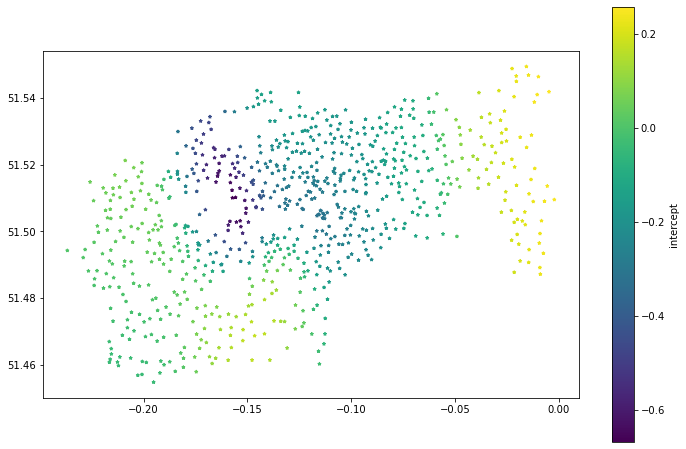

In [51]:
gdf.plot(figsize=(12,8), marker='*', markersize=10, 
         column='intercept', cmap='viridis', 
         legend=True, legend_kwds={'label':'intercept'})

<AxesSubplot:>

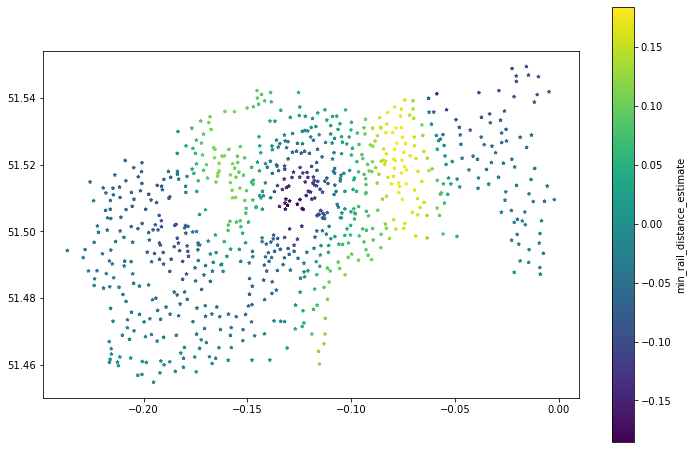

In [52]:
gdf.plot(figsize=(12,8), marker='*', markersize=10, 
         column='min_rail_distance_estimate', cmap='viridis', 
         legend=True, legend_kwds={'label':'min_rail_distance_estimate'})

<AxesSubplot:>

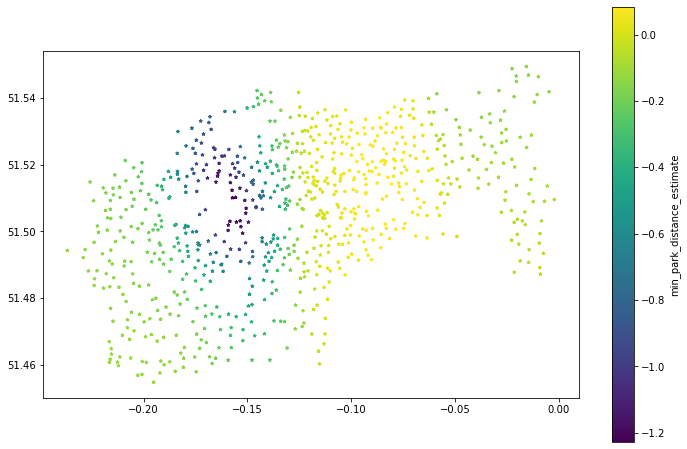

In [53]:
gdf.plot(figsize=(12,8), marker='*', markersize=10, 
         column='min_park_distance_estimate', cmap='viridis', 
         legend=True, legend_kwds={'label':'min_park_distance_estimate'})

<AxesSubplot:>

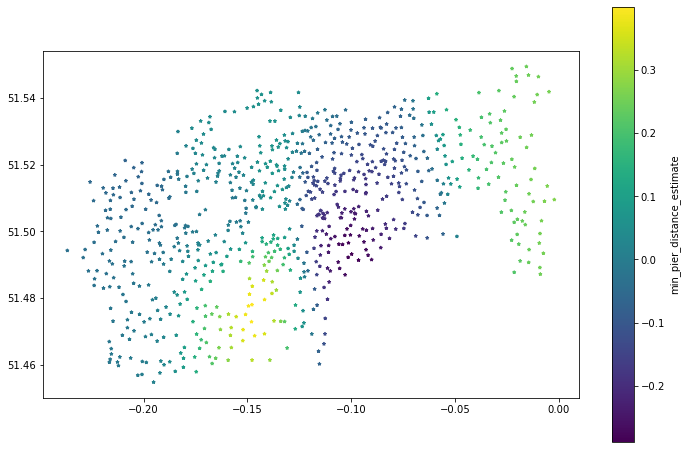

In [54]:
gdf.plot(figsize=(12,8), marker='*', markersize=10, 
         column='min_pier_distance_estimate', cmap='viridis', 
         legend=True, legend_kwds={'label':'min_pier_distance_estimate'})

<AxesSubplot:>

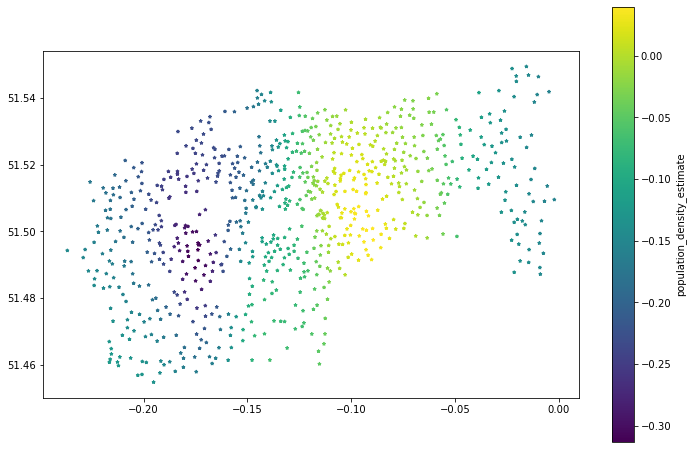

In [55]:
gdf.plot(figsize=(12,8), marker='*', markersize=10, 
         column='population_density_estimate', cmap='viridis', 
         legend=True, legend_kwds={'label':'population_density_estimate'})

<AxesSubplot:>

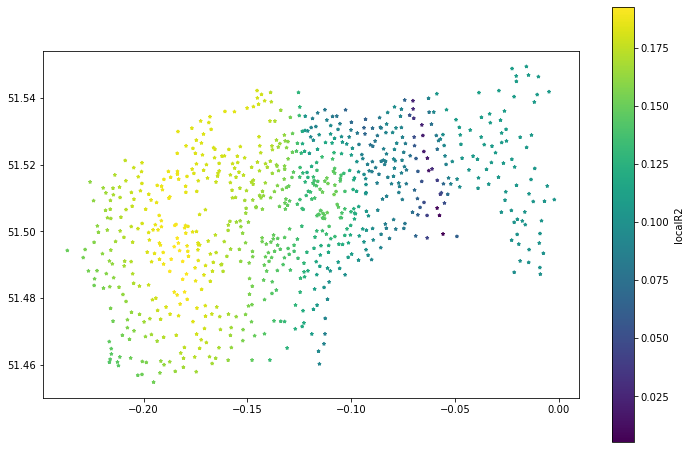

In [56]:
gdf.plot(figsize=(12,8), marker='*', markersize=10, 
         column='localR2', cmap='viridis', 
         legend=True, legend_kwds={'label':'localR2'})

In [57]:
# Filtering only significant result at 0.05 (95% confidence interval)
filtered_estimates95 = results.filter_tvals(alpha=.05)
filtered_estimates95

# Can you check the estimates using 99% and 90% confidence interval
filtered_estimates90 = results.filter_tvals(alpha=.1)
filtered_estimates99 = results.filter_tvals(alpha=.01)

In [58]:
filtered_estimates95

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -2.87653938,  0.        , -2.73469125],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       ...,
       [-1.97428879,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [59]:
# Convert arrays to data frame
data_params95 = pd.DataFrame(filtered_estimates95)
data_localR2 = pd.DataFrame(results.localR2)

In [60]:
# Create the new dataframe
df3=pd.DataFrame(GWRdata2021["name"])
df4 = df1.assign(intercept=data_params95[0],
                 min_rail_distance_95=data_params95[1],
                 min_park_distance_95=data_params95[2],
                 min_pier_distance_95=data_params95[3],
                 population_density_95=data_params95[4],
                 localR2=data_localR2[0])
df4.columns
df4

,name,intercept,min_rail_distance_95,min_park_distance_95,min_pier_distance_95,population_density_95,localR2
0,"River Street , Clerkenwell",0.000000,0.0,0.000000,0.0,0.000000,0.106394
1,"Phillimore Gardens, Kensington",0.000000,0.0,-2.876539,0.0,-2.734691,0.183200
2,"Christopher Street, Liverpool Street",0.000000,0.0,0.000000,0.0,0.000000,0.086668
3,"St. Chad's Street, King's Cross",0.000000,0.0,0.000000,0.0,0.000000,0.097632
4,"Broadcasting House, Marylebone",-2.020810,0.0,-4.084501,0.0,-2.542436,0.170809
...,...,...,...,...,...,...,...
784,"George Row, Bermondsey",0.000000,0.0,0.000000,0.0,0.000000,0.066832
785,"Tower Wharf, Bermondsey",0.000000,0.0,0.000000,0.0,0.000000,0.080546
786,"Temple Gardens, Temple",-1.974289,0.0,0.000000,0.0,0.000000,0.153616
787,"Canada Water Station, Rotherhithe",0.000000,0.0,0.000000,0.0,0.000000,0.063414


In [61]:
# Merge our shapefile with the model's results
GWRdata2021_95 = GWRdata2021.merge(df4, left_on='name', right_on='name')
GWRdata2021_95

,name,id,lat,lon,number,min_rail,min_rail_distance,min_park,min_park_distance,min_pier,min_pier_distance,population_density,intercept,min_rail_distance_95,min_park_distance_95,min_pier_distance_95,population_density_95,localR2
0,"River Street , Clerkenwell",1,51.529163,-0.109971,10.0,Kings Cross_diatance,990.0,Lincoln's Inn Fields South_distance,1564.0,Blackfriars Pier_diatance,2154.0,13116.0,0.000000,0.0,0.000000,0.0,0.000000,0.106394
1,"Phillimore Gardens, Kensington",2,51.499607,-0.197574,33.0,Paddington_diatance,2415.0,Holland Park Duchess of Bedford_diatance,386.0,Cadogan Pier_diatance,2854.0,12893.0,0.000000,0.0,-2.876539,0.0,-2.734691,0.183200
2,"Christopher Street, Liverpool Street",3,51.521284,-0.084606,13.0,Liverpool Street_diatance,362.0,Lincoln's Inn Fields South_distance,2273.0,London Bridge City Pier_diatance,1596.0,6784.0,0.000000,0.0,0.000000,0.0,0.000000,0.086668
3,"St. Chad's Street, King's Cross",4,51.530059,-0.120974,22.0,Kings Cross_diatance,306.0,Lincoln's Inn Fields West_distance,1584.0,Embankment Pier_diatance,2567.0,26642.0,0.000000,0.0,0.000000,0.0,0.000000,0.097632
4,"Broadcasting House, Marylebone",6,51.518118,-0.144229,35.0,Euston_diatance,1356.0,The Regent's Park St. Andrew's Gate_distance,813.0,Embankment Pier_diatance,2011.0,10022.0,-2.020810,0.0,-4.084501,0.0,-2.542436,0.170809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,"George Row, Bermondsey",840,51.498585,-0.068982,85.0,London Bridge_diatance,1342.0,Geraldine Mary Harmsworth Park East_diatance,2582.0,Tower Bridge Quay_diatance,879.0,16437.0,0.000000,0.0,0.000000,0.0,0.000000,0.066832
785,"Tower Wharf, Bermondsey",841,51.500845,-0.074704,65.0,London Bridge_diatance,874.0,Geraldine Mary Harmsworth Park East_diatance,2235.0,Tower Bridge Quay_diatance,576.0,40648.0,0.000000,0.0,0.000000,0.0,0.000000,0.080546
786,"Temple Gardens, Temple",842,51.510981,-0.108322,43.0,Blackfriars_diatance,375.0,Lincoln's Inn Fields South_distance,752.0,Blackfriars Pier_diatance,512.0,2733.0,-1.974289,0.0,0.000000,0.0,0.000000,0.153616
787,"Canada Water Station, Rotherhithe",844,51.498439,-0.049150,186.0,Fenchurch Street_diatance,2479.0,Mile End Park Pavilion_diatance,2409.0,Greenland Pier_diatance,1276.0,19518.0,0.000000,0.0,0.000000,0.0,0.000000,0.063414


In [62]:
GWRdata2021_95.to_csv('GWRdata2021_95.csv', header=True, index=None)

In [63]:
gdf_95 = gpd.GeoDataFrame(GWRdata2021_95, 
      geometry=gpd.points_from_xy(GWRdata2021_95['lon'], GWRdata2021_95['lat'], crs='epsg:4326'))

In [64]:
gdf_95

,name,id,lat,lon,number,min_rail,min_rail_distance,min_park,min_park_distance,min_pier,min_pier_distance,population_density,intercept,min_rail_distance_95,min_park_distance_95,min_pier_distance_95,population_density_95,localR2,geometry
0,"River Street , Clerkenwell",1,51.529163,-0.109971,10.0,Kings Cross_diatance,990.0,Lincoln's Inn Fields South_distance,1564.0,Blackfriars Pier_diatance,2154.0,13116.0,0.000000,0.0,0.000000,0.0,0.000000,0.106394,POINT (-0.10997 51.52916)
1,"Phillimore Gardens, Kensington",2,51.499607,-0.197574,33.0,Paddington_diatance,2415.0,Holland Park Duchess of Bedford_diatance,386.0,Cadogan Pier_diatance,2854.0,12893.0,0.000000,0.0,-2.876539,0.0,-2.734691,0.183200,POINT (-0.19757 51.49961)
2,"Christopher Street, Liverpool Street",3,51.521284,-0.084606,13.0,Liverpool Street_diatance,362.0,Lincoln's Inn Fields South_distance,2273.0,London Bridge City Pier_diatance,1596.0,6784.0,0.000000,0.0,0.000000,0.0,0.000000,0.086668,POINT (-0.08461 51.52128)
3,"St. Chad's Street, King's Cross",4,51.530059,-0.120974,22.0,Kings Cross_diatance,306.0,Lincoln's Inn Fields West_distance,1584.0,Embankment Pier_diatance,2567.0,26642.0,0.000000,0.0,0.000000,0.0,0.000000,0.097632,POINT (-0.12097 51.53006)
4,"Broadcasting House, Marylebone",6,51.518118,-0.144229,35.0,Euston_diatance,1356.0,The Regent's Park St. Andrew's Gate_distance,813.0,Embankment Pier_diatance,2011.0,10022.0,-2.020810,0.0,-4.084501,0.0,-2.542436,0.170809,POINT (-0.14423 51.51812)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,"George Row, Bermondsey",840,51.498585,-0.068982,85.0,London Bridge_diatance,1342.0,Geraldine Mary Harmsworth Park East_diatance,2582.0,Tower Bridge Quay_diatance,879.0,16437.0,0.000000,0.0,0.000000,0.0,0.000000,0.066832,POINT (-0.06898 51.49858)
785,"Tower Wharf, Bermondsey",841,51.500845,-0.074704,65.0,London Bridge_diatance,874.0,Geraldine Mary Harmsworth Park East_diatance,2235.0,Tower Bridge Quay_diatance,576.0,40648.0,0.000000,0.0,0.000000,0.0,0.000000,0.080546,POINT (-0.07470 51.50084)
786,"Temple Gardens, Temple",842,51.510981,-0.108322,43.0,Blackfriars_diatance,375.0,Lincoln's Inn Fields South_distance,752.0,Blackfriars Pier_diatance,512.0,2733.0,-1.974289,0.0,0.000000,0.0,0.000000,0.153616,POINT (-0.10832 51.51098)
787,"Canada Water Station, Rotherhithe",844,51.498439,-0.049150,186.0,Fenchurch Street_diatance,2479.0,Mile End Park Pavilion_diatance,2409.0,Greenland Pier_diatance,1276.0,19518.0,0.000000,0.0,0.000000,0.0,0.000000,0.063414,POINT (-0.04915 51.49844)


In [65]:
import geopandas as gpd
import matplotlib.pyplot as plt
parks = gpd.read_file('data_geo/Green-spaces-London/Green_spaces.shp')
water = gpd.read_file('data_geo/greater-london-latest-free/gis_osm_water_a_free_1.shp')
railways = gpd.read_file('data_geo/greater-london-latest-free/gis_osm_railways_free_1.shp')

In [66]:
parks

,OBJECTID,osm_id,osm_way_id,name,landuse,leisure,natural,other_tags,TypeMain,Shape_Leng,Shape_Area,geometry
0,1,None,3810263,Bush Hill Park Golf Club,None,golf_course,None,None,Golf course,3748.069137,351211.895723,"POLYGON ((532601.064 195822.971, 532685.913 19..."
1,2,None,3810529,Trent Park Golf Course,None,golf_course,None,None,Golf course,3191.544500,553123.536821,"POLYGON ((529421.919 196073.170, 529390.124 19..."
2,3,None,3810598,Enfield Golf Club,None,golf_course,None,None,Golf course,3815.877208,437609.027504,"POLYGON ((531209.674 196673.211, 531231.627 19..."
3,4,None,3819393,Hadley Wood Golf Course,None,golf_course,None,None,Golf course,3390.045075,629048.379119,"POLYGON ((527296.475 197985.413, 527362.395 19..."
4,5,None,3848339,Old Ford Manor Golf Course,None,golf_course,None,"""addr:city""=>""Hadley Green, Barnet"",""addr:coun...",Golf course,3703.617239,520239.674975,"POLYGON ((524435.609 198102.583, 524397.977 19..."
...,...,...,...,...,...,...,...,...,...,...,...,...
21018,21019,None,296586611,None,cemetery,None,None,None,cemetery,1888.813240,104242.934613,"POLYGON ((519227.275 174644.779, 519243.578 17..."
21019,21020,None,296586663,None,cemetery,None,None,None,cemetery,984.491501,40773.253149,"POLYGON ((518936.318 174421.754, 519132.706 17..."
21020,21021,None,300140505,Willesden New Cemetery,cemetery,None,None,None,cemetery,1593.637667,108019.997361,"POLYGON ((521791.010 184637.709, 521799.800 18..."
21021,21022,None,300140506,Liberal Jewish Cemetery,cemetery,None,None,None,cemetery,730.298775,27654.170296,"POLYGON ((522329.197 184279.808, 522350.501 18..."


epsg:27700
[503128.5835 155225.5914 561127.8949 201734.6446]


<AxesSubplot:>

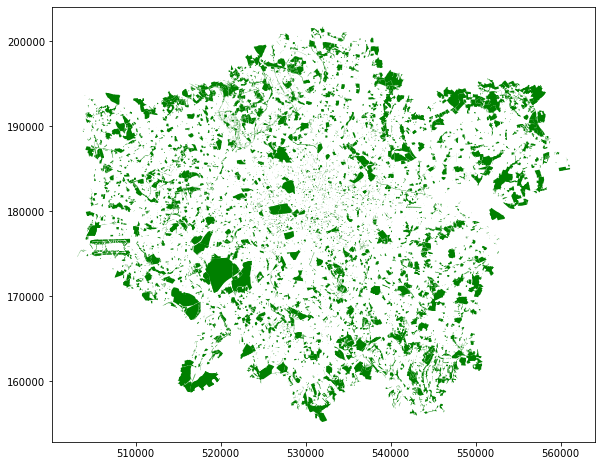

In [67]:
print(parks.geometry.crs)
print(parks.total_bounds)
parks.plot(figsize=(12,8), marker='*', color='green', markersize=0.25)

epsg:4326
[-0.51692629 51.28089389  0.32212301 51.69883519]


<AxesSubplot:>

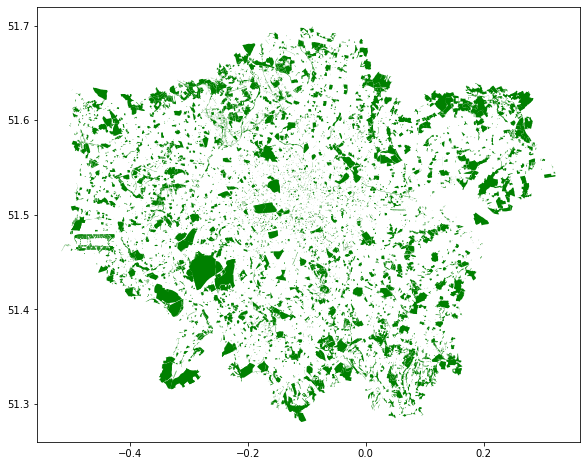

In [68]:
parks = parks.to_crs("epsg:4326")
print(parks.geometry.crs)
print(parks.total_bounds)
parks.plot(figsize=(12,8), marker='*', color='green', markersize=0.5)

In [ ]:
# First, let's create empty set of subplots with 2 rows and 3 columns
f,ax=plt.subplots(6,1,figsize=(120,80), subplot_kw=dict(aspect='equal'))
# Flatten them
ax = ax.flatten()
# Define the title of our plots
titles = ['Intercept_95','min_rail_distance_95', 'min_park_distance_95','min_pier_distance_95', 'population_density_95']

# Here, we are creating loop for our parameter estimates 
for i,row in enumerate(filtered_estimates95.T):
    # We want to plot all the non-significant estimates in grey
    parks.plot(edgecolor=(0.7, 0.7, 0.14, 0.25), facecolor=('#ECF9E4'),ax=ax[i])
    water.plot(edgecolor="none", facecolor='xkcd:lightblue',ax=ax[i])
    railways.plot(edgecolor=(0.7, 0.7, 0.14, 0.25),ax=ax[i])
    ct_temp = gdf_95.assign(toplot=filtered_estimates95.T[i])
    (ct_temp.query('toplot==0')
     .sort_values('toplot')
     .plot(color='#2F1CBA',ax=ax[i],alpha=.2))
    # and assign colours only to the significant estimates
    (ct_temp.query('toplot!=0')
     .sort_values('toplot')
     .plot('toplot',
           cmap='magma',
           ax=ax[i],
           legend=True))
    
    ax[i].set_title(titles[i], fontsize=32)
    
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlim([-0.238,0.015])
    ax[i].set_ylim([51.450,51.560])
    

 
# For the last one, local R2, we can just map all of them regarding the significance

parks.plot(edgecolor=(0.7, 0.7, 0.14, 0.25), facecolor=('#ECF9E4'),ax=ax[-1])
water.plot(edgecolor="none", facecolor='xkcd:lightblue',ax=ax[-1])
railways.plot(edgecolor=(0.7, 0.7, 0.14, 0.25),ax=ax[-1])
(gdf_95.assign(r2=results.localR2)
 .sort_values('r2')
 .plot('r2',
       ax=ax[-1],
       legend=True,
       vmin=0,
       vmax=1,
       cmap='Reds'))
    
ax[-1].set_xticklabels([])
ax[-1].set_yticklabels([])
ax[-1].set_xticks([])
ax[-1].set_yticks([])
ax[-1].set_xlim([-0.238,0.015])
ax[-1].set_ylim([51.450,51.560])
    
ax[-1].set_title('Local R2', fontsize=32)
    
f.tight_layout()
    
plt.show()
    

/opt/conda/envs/sds2021/lib/python3.9/site-packages/geopandas/plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
